<a href="https://colab.research.google.com/github/ankit986/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
---

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**
---

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# **Introduction**
---

Insurance is an agreement by which an individual obtains protection against any losses from an insurance company against the risks of damage, financial losses, damage, illness, or death in return for the payment of a specified premium. In this project, we have an insurance details dataset which contains a total of *381109 rows* and *12 features*. We have a categorical dependent variable *Response* which represents whether a customer is interested in vehicle insurance or not.
As an initial step, we checked for the null and duplicate values in our dataset. As there were no null and duplicate values present in our dataset, so data cleaning was not required. Further, we *normalized* the numerical columns for bringing them on the same scale.

In **Exploratory Data Analysis**, we categorized the Age as *YoungAge,* *MiddleAge, OldAge*.Then we categorized *Region_Code* and *Policy_Sales_Channel* to extract some valuable information from these features. We explored the independent features using some plots.

For **Feature selection**, we used Kendall's rank correlation coefficient for numerical features and for categorical features, we applied the Mutual Information technique.

For **Model prediction**, we used supervised machine learning algorithms like *Decision tree Classifier, AdaBoost, LightGBM, BaggingRegressor, NaiveBayes and Logistic regression*. Then applied hyperparameter tuning techniques to obtain better accuracy and to avoid overfitting.


*So, without any further delay let’s move ahead!*

# **Installing Dependencies**


---



In [1]:
#@title
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 64.6 MB/s eta 0:00:00


## **Importing Libraries**
---

In [2]:
#@title

# Basic
import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split

# ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss


# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from scipy.stats import reciprocal
from scipy.stats import uniform

# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# **Reading Dataset**
---

Let's read the dataset we have to work on! We have a dataset of Health Insurance details.


In [3]:
df = pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

# **Data Wrangling**


---



- Data wrangling is the process of cleaning and unifying messy and complex data sets for easy access and analysis.

- This process typically includes manually converting and mapping data from one raw form into another format to allow for more convenient consumption and organization of the data.

*Let's dive into the dataset!*

## **Health Insurance Dataset**
---

### **Columns:**
> **ID:** Unique identifier for the Customer.

> **Age:** Age of the Customer.

> **Gender:** Gender of the Customer.

>  **Driving_License:** 0 for customer not having DL, 1 for customer having DL.

> **Region_Code:** Unique code for the region of the customer.

> **Previously_Insured:** 0 for customer not having vehicle insurance, 1 for customer having vehicle insurance.

> **Vehicle_Age:** Age of the vehicle.

> **Vehicle_Damage:** Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

> **Annual_Premium:** The amount customer needs to pay as premium in the year.

> **Policy_Sales_Channel:** Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

> **Vintage:** Number of Days, Customer has been associated with the company.

> **Response (Dependent Feature):** 1 for Customer is interested, 0 for Customer is not interested.

*Let's deep dive into the dataset,*

In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.shape

(381109, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Checking for Duplicate Data:**

In [8]:
df[df.duplicated()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


**Checking for Null Values:**

In [9]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### **Observations:**
---
- As we can see, our data set contains 381109 rows and 12 columns.
- We have 5 numeric (Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage) and 5 categorical independent features(Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage).
- Our dependent feature is a categorical column

## **Data Cleaning and Refactoring**
---
Let's reformat and clean the data for smooth processing!

### **Finding Outliers**
---
*Let's take a look at the outliers (if any) in our dataset.*

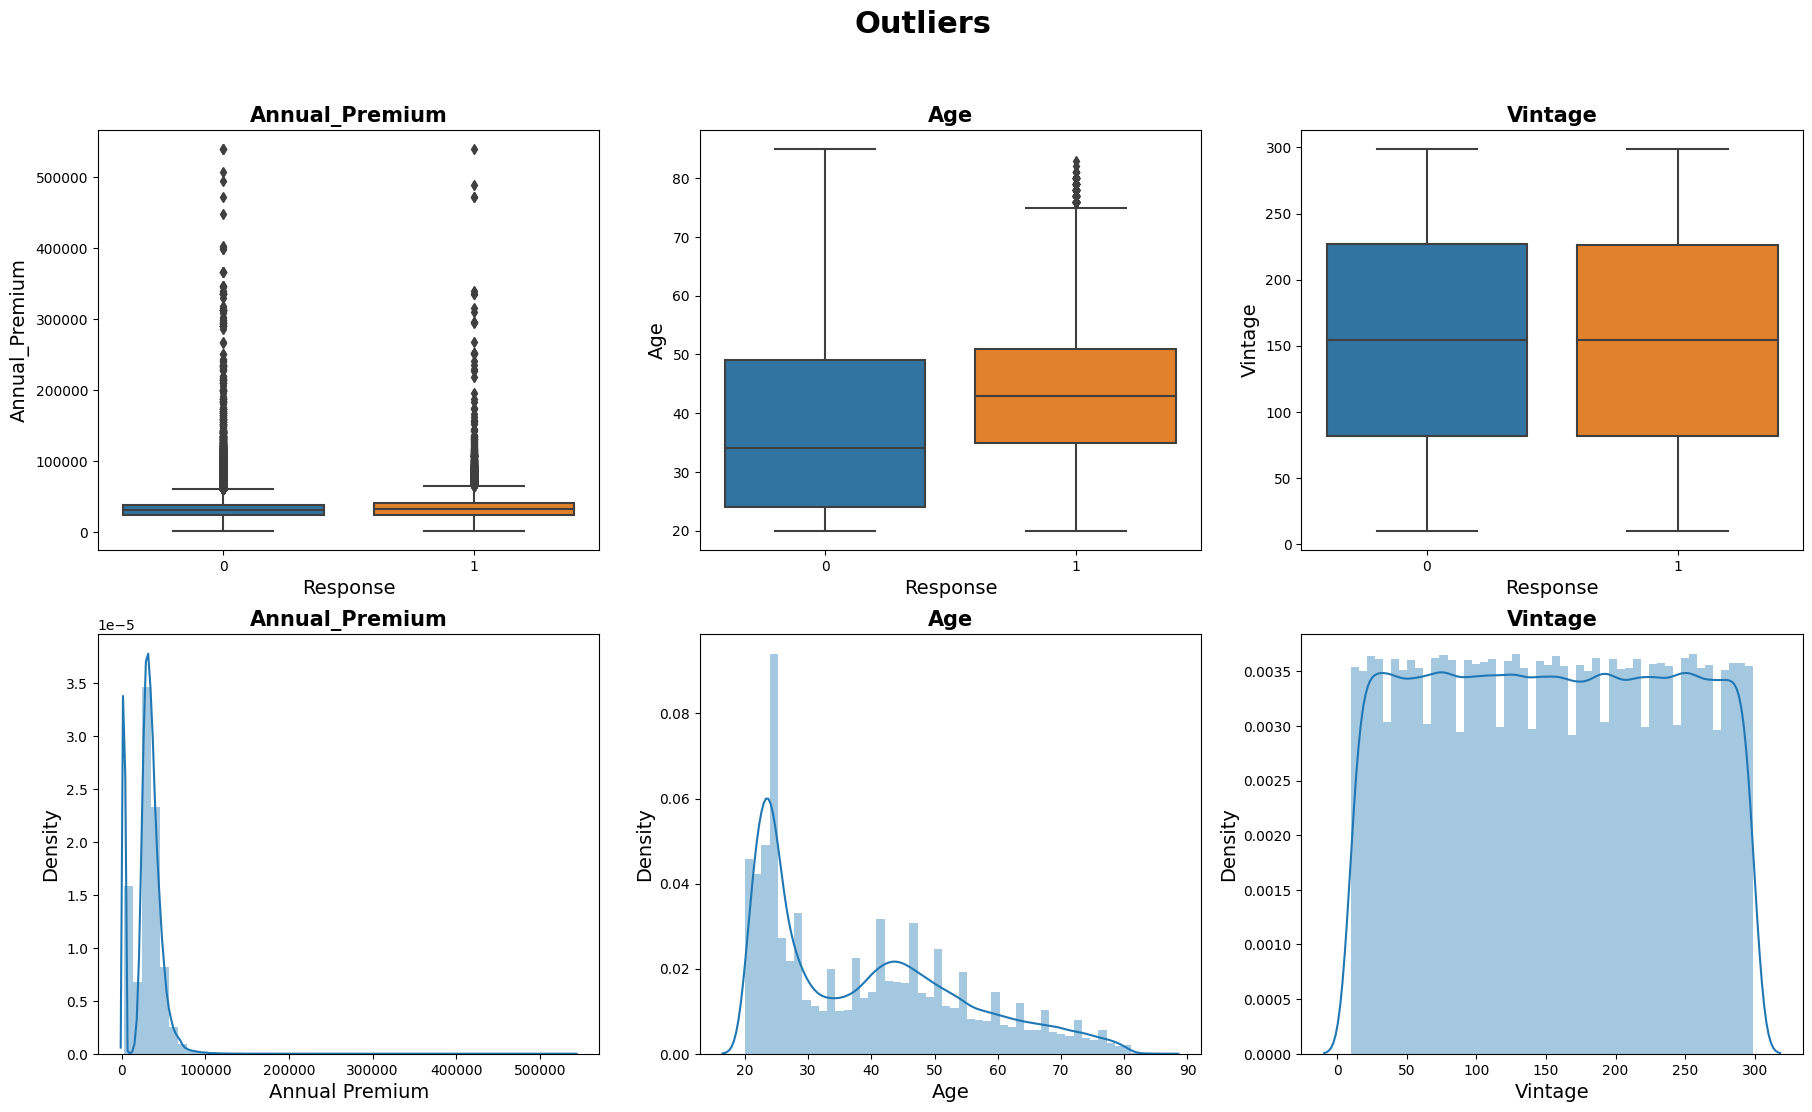

In [10]:
def show_outliers(df):

    fig, axes = plt.subplots(2, 3, figsize=(22,12))

    sns.boxplot(ax = axes[0][0],y = 'Annual_Premium',x = 'Response', data = df)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][1],y = 'Age',x = 'Response', data = df)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    axes[0][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][2],y = 'Vintage',x = 'Response', data = df)
    axes[0][2].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})


    sns.distplot(ax = axes[1][0],x = df['Annual_Premium'])
    axes[1][0].set_xlabel(xlabel = 'Annual Premium', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][1],x = df['Age'])
    axes[1][1].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][2],x = df['Vintage'])
    axes[1][2].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Outliers', fontsize = 22, fontweight = 'bold' )

show_outliers(df)

*   From the above plot it can be implied that **Annual Premium** has a poitively skewed distribution.
*   From above we can also depict that **Vintage** has a approximatly uniform distribution.
* **Age** columns has some outliers and it is positively skewed but we are not going to treat them because it won't be affecting our result.


## **Outlier Treatment and Feature Scaling**


---

*   For Outlier treatment we will be applying quantile method.
*   For feature Scaling we will be using MinMaxScaler technique for Normlization.

In [11]:
def outlier_treatment(df):
    Q1=df['Annual_Premium'].quantile(0.25)
    Q3=df['Annual_Premium'].quantile(0.75)
    IQR=Q3-Q1

    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df['Annual_Premium_Treated'] = np.where(df['Annual_Premium']>Upper_Whisker, Upper_Whisker, df['Annual_Premium'])   ### Np.where

def scale_features(df):
    scaler = MinMaxScaler()

    df['Annual_Premium_Treated'] = scaler.fit_transform(df['Annual_Premium_Treated'].values.reshape(-1,1))
    df['Vintage_Treated'] = scaler.fit_transform(df['Vintage'].values.reshape(-1,1))

outlier_treatment(df)
scale_features(df)

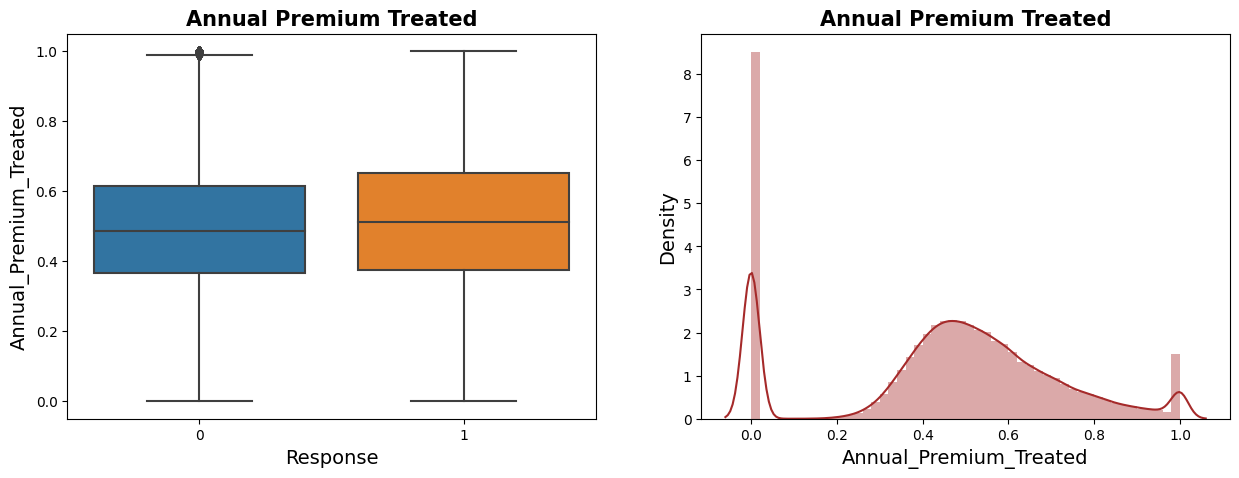

In [12]:
def show_ann_prem_outliers(df):

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.boxplot(ax = axes[0], y = 'Annual_Premium_Treated',x = 'Response', data = df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1], x = df['Annual_Premium_Treated'], color='brown')
    axes[1].set_xlabel(xlabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})


show_ann_prem_outliers(df)

*   From the above plots we can see that there are no more outliers in *Annual Premium*.

# **Exploratory Data Analysis**
---


In [13]:
def show_distribution_numerical_features(df):
    fig, axes = plt.subplots(2,2, figsize=(20,15))

    sns.histplot(ax = axes[0][0],x = 'Age', data = df, hue='Response')
    axes[0][0].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][0].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[0][1],x = 'Region_Code', data = df[df['Region_Code'].isin(df['Region_Code'].value_counts().head(15).index.values)], hue='Response')
    axes[0][1].set_xlabel(xlabel = 'Region_Code', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][1].set_title('Region_Code',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[1][0],x = 'Policy_Sales_Channel', data = df[df['Policy_Sales_Channel'].isin(df['Policy_Sales_Channel'].value_counts().head(15).index.values)], hue='Response')
    axes[1][0].set_xlabel(xlabel = 'Policy_Sales_Channel', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][0].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.histplot(ax = axes[1][1], x = df['Vintage'],data = df, hue='Response')
    axes[1][1].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][1].set_title('Vintage',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Distribution of Numerical Features', fontsize = 22, fontweight = 'bold' )

In [14]:
def show_violin_distribution(df):
    sns.catplot(y = 'Age', data = df, x='Response', kind = 'violin')
    plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    plt.title('Age Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

    sns.catplot(y = 'Region_Code', data = df, x='Response', kind = 'violin')
    plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Region_Code', fontdict={'fontsize': 14})
    plt.title('Region Code Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

    sns.catplot(y = 'Policy_Sales_Channel', data = df, x='Response', kind = 'violin')
    plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Policy_Sales_Channel', fontdict={'fontsize': 14})
    plt.title('Policy Sales Channel Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

In [15]:
def convert_numerical_to_categorical(df):
    # Categorizing Age feature
    df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')

    # Categorizing Policy_Sales_Channel feature
    x = df['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>100000 else 'Channel_B' if 74000<x<100000 else 'Channel_C' if 10000<x<=74000 else 'Channel_D')
    res = dict(zip(x.keys(),x.values))
    df['Policy_Sales_Channel_Categorical'] = df['Policy_Sales_Channel'].map(res)                  ##################  Good logic ###############3

    # Categorizing Region Code feature
    x = df['Region_Code'].value_counts().apply(lambda x: 'Region_A' if x>100000 else 'Region_B' if x>11000 and x<340000 else 'Region_C')
    res = dict(zip(x.keys(),x.values))
    df['Region_Code_Categorical'] = df['Region_Code'].map(res)
    # df.Region_Code_Categorical.value_counts()

convert_numerical_to_categorical(df)

In [16]:
def show_distribution_num_to_cat(df):
    fig, axes = plt.subplots(1,3, figsize=(22,5))

    sns.countplot(ax = axes[0],x = 'Age_Group', data = df, hue='Response')
    axes[0].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0].set_title('Age', fontdict={'fontsize': 15})

    sns.countplot(ax = axes[1],x = 'Region_Code_Categorical', data = df, hue='Response')
    axes[1].set_xlabel(xlabel = 'Region_Code_Categorical', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1].set_title('Region_Code',fontdict={'fontsize': 15})

    sns.countplot(ax = axes[2],x = 'Policy_Sales_Channel_Categorical', data = df, hue='Response')
    axes[2].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[2].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[2].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15})

    plt.suptitle('Distribution of Categorical Features', fontsize = 22, fontweight = 'bold' )

In [17]:
def show_gender_response_relation(df):
    sns.catplot(x="Response", hue="Gender", kind="count",
                palette="pastel",
                data=df)
    plt.xlabel('Response', fontdict={'fontsize':12})
    plt.ylabel('Count',fontdict={'fontsize': 14})
    plt.title('Response V/S Gender', fontdict={'fontsize': 15, 'fontweight':'bold'})

In [18]:
def show_age_relations(df):
    fig, axes = plt.subplots(1,3, figsize=(25,8))
    sns.countplot(ax = axes[0],x="Response", hue="Age_Group", palette="pastel",
            data=df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0].set_title('Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.histplot(ax = axes[1],binwidth=0.5, x="Age_Group",
                 hue="Previously_Insured", data=df,
                 stat="count", multiple="stack")
    axes[1].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1].set_title('Age_Group V/S Previously_Insured', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.lineplot(ax = axes[2], x="Age",y="Annual_Premium_Treated",
                 data=df,hue="Gender")
    axes[2].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[2].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[2].set_title('Age V/S Annual Premium Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})

In [19]:
def vehicle_damage_distribution(df):
    fig = px.pie(df, values='Response', names='Vehicle_Damage', title='Vehicle Damage Distribution',labels = df['Vehicle_Damage'].unique())
    fig.show()

In [20]:
def show_vechile_damage_relations(df):
    fig, axes = plt.subplots(1,2, figsize=(22,8))
    sns.pointplot(ax = axes[0], x="Vehicle_Damage", y="Response", hue="Vehicle_Age", data=df)
    axes[0].set_xlabel(xlabel = 'Vehicle_Damage', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_title('Vehicle_Damage V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(x = 'Vehicle_Damage', y = 'Annual_Premium_Treated', data=df)
    axes[1].set_xlabel(xlabel = 'Vehicle_Damage', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_title('Vehicle_Damage V/S Annual_Premium_Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})

In [21]:
def vehicle_age_distribution(df):
    plt.figure(figsize=(10, 8))
    sns.countplot(x = 'Vehicle_Age', hue='Response', data = df, palette="Dark2")
    plt.xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    plt.title('Vehicle_Age', fontdict={'fontsize': 15, 'fontweight':'bold'})

In [22]:
def show_vehicle_age_relation(df):
    fig, axes = plt.subplots(2,3, figsize=(22,15))

    sns.barplot(ax = axes[0][0], x = 'Vehicle_Age', y='Response', data = df)
    axes[0][0].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[0][1], y = 'Response', x = 'Vehicle_Age', hue = 'Vehicle_Damage', data=df)
    axes[0][1].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[0][2], y = 'Response', x = 'Vehicle_Age', hue = 'Region_Code_Categorical', data=df)
    axes[0][2].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[1][0], y = 'Response', x = 'Vehicle_Age', hue = 'Policy_Sales_Channel_Categorical', data=df )
    axes[1][0].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[1][0].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.boxplot(ax = axes[1][1], y = 'Annual_Premium_Treated', x = 'Vehicle_Age', hue = 'Vehicle_Damage', data=df )
    axes[1][1].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][1].set_title('Vehicle_Age V/S Annual_Premium_Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.stripplot(ax = axes[1][2], y = 'Annual_Premium_Treated', x = 'Vehicle_Age', hue = 'Vehicle_Damage', data=df )
    axes[1][2].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vehicle_Age V/S Annual_Premium_Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})

In [23]:
def show_annual_premium_relation(df):
    fig, axes = plt.subplots(2,2, figsize=(15,12))

    sns.pointplot(ax = axes[0][0], x = 'Response', y = 'Annual_Premium_Treated', data = df)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.violinplot(ax = axes[0][1], x = 'Response', y = 'Annual_Premium_Treated', data = df)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0][1].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.swarmplot(ax = axes[1][0], x = 'Response', y = 'Annual_Premium_Treated', data = df[:1000])
    axes[1][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.stripplot(ax = axes[1][1], x = 'Response', y = 'Annual_Premium_Treated', data = df)
    axes[1][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][1].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

In [24]:
def show_annual_premium_with_age_group(df):
    fig, axes = plt.subplots(1,2, figsize=(15,8))

    sns.barplot(ax = axes[0],y = 'Annual_Premium_Treated', x = 'Age_Group', data=df)
    axes[0].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual_Premium_Treated V/S Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.violinplot(ax = axes[1], y = 'Annual_Premium_Treated', x = 'Age_Group', data=df)
    axes[1].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_title('Annual_Premium_Treated V/S Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})

In [25]:
def age_group_distribution(df):
    fig, axes = plt.subplots(1,3, figsize=(15,6))

    colors = sns.color_palette('pastel')[0:4]
    explode = (0.01, 0.25, 0.01)
    axes[0].pie( x= df.groupby('Age_Group')['Response'].sum(),explode=explode,
            labels=df['Age_Group'].unique(), colors=colors, autopct='%1.1f%%',
            shadow=True);
    axes[0].set_title('with Response', fontsize = 15, fontweight ='bold', pad=15)

    axes[1].pie(x=df.groupby('Age_Group')['Annual_Premium'].sum(),explode=explode,
            labels=df['Age_Group'].unique(), colors=colors, autopct='%1.1f%%',
            shadow=True);
    axes[1].set_title('with Annual_Premium', fontsize = 15, fontweight ='bold', pad=15)

    axes[2].pie(x=df.groupby('Age_Group')['Previously_Insured'].sum(),explode=explode,
            labels=df['Age_Group'].unique(), colors=colors, autopct='%1.1f%%',
            shadow=True);
    axes[2].set_title('with Previously_Insured', fontsize = 15, fontweight ='bold', pad=15)

    plt.suptitle('Age Group Distribution',fontsize = 20, fontweight ='bold')


In [26]:
def show_policy_sales_channel_relation(df):

    fig, axes = plt.subplots(2,3, figsize=(22,15))

    sns.pointplot(ax = axes[0][0], x='Policy_Sales_Channel_Categorical', y='Vintage',data=df)
    axes[0][0].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][0].set_title('Policy_Sales_Channel V/S Vintage',
                         fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[0][1], x='Policy_Sales_Channel_Categorical', y='Annual_Premium_Treated',data=df)
    axes[0][1].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0][1].set_title('Policy_Sales_Channel V/S Annual_Premium_Treated',
                         fontdict={'fontsize': 15, 'fontweight':'bold'})

    df['Policy_Sales_Channel_Categorical'].value_counts().plot(ax = axes[0][2] ,kind='barh')
    axes[0][2].set_xlabel(xlabel = 'Count', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[0][2].set_title('Policy_Sales_Channel', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.histplot(ax = axes[1][0],x="Policy_Sales_Channel_Categorical", hue="Response", data=df, stat="count",
                 multiple="stack",binwidth=0.5)
    axes[1][0].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][0].set_title('Policy_Sales_Channel', fontdict={'fontsize': 15, 'fontweight':'bold'})

    groupPolicySalesBySum=df.groupby(by=["Policy_Sales_Channel_Categorical"]).sum().reset_index()
    sns.barplot(ax = axes[1][1], x="Policy_Sales_Channel_Categorical", y="Response", data=groupPolicySalesBySum)
    axes[1][1].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[1][1].set_title('Policy_Sales_Channel V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})


    sns.barplot(ax = axes[1][2], x='Policy_Sales_Channel_Categorical', y='Response', data=df, hue='Region_Code_Categorical')
    axes[1][2].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[1][2].set_title('Policy_Sales_Channel V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

### **Exploring the Numerical Features**
---

We have 4 numerical features: Age, Policy_Sales_Channel, Region_Code, Vintage. Without any further delay, let's explore these features.


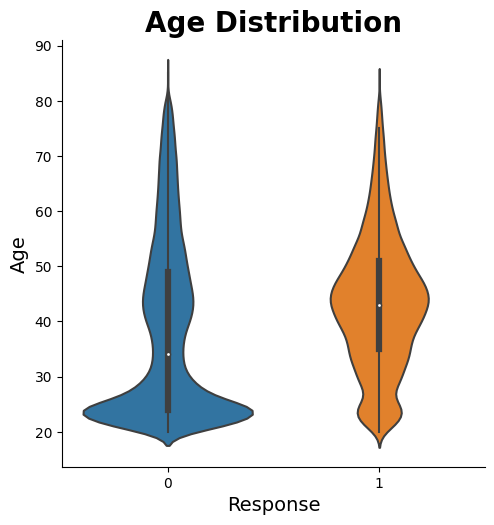

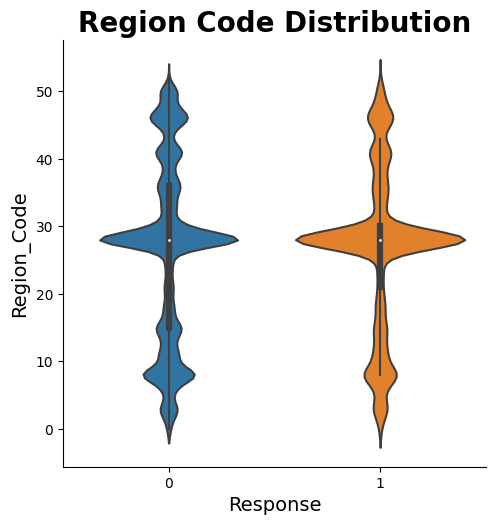

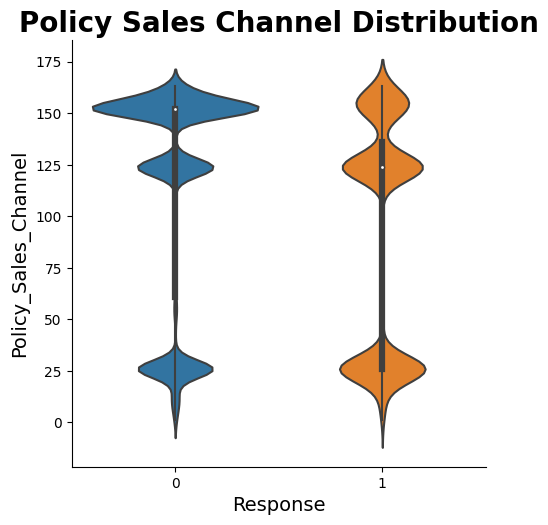

In [27]:
show_violin_distribution(df)

### **Converting Numerical Columns to Categorical**
---

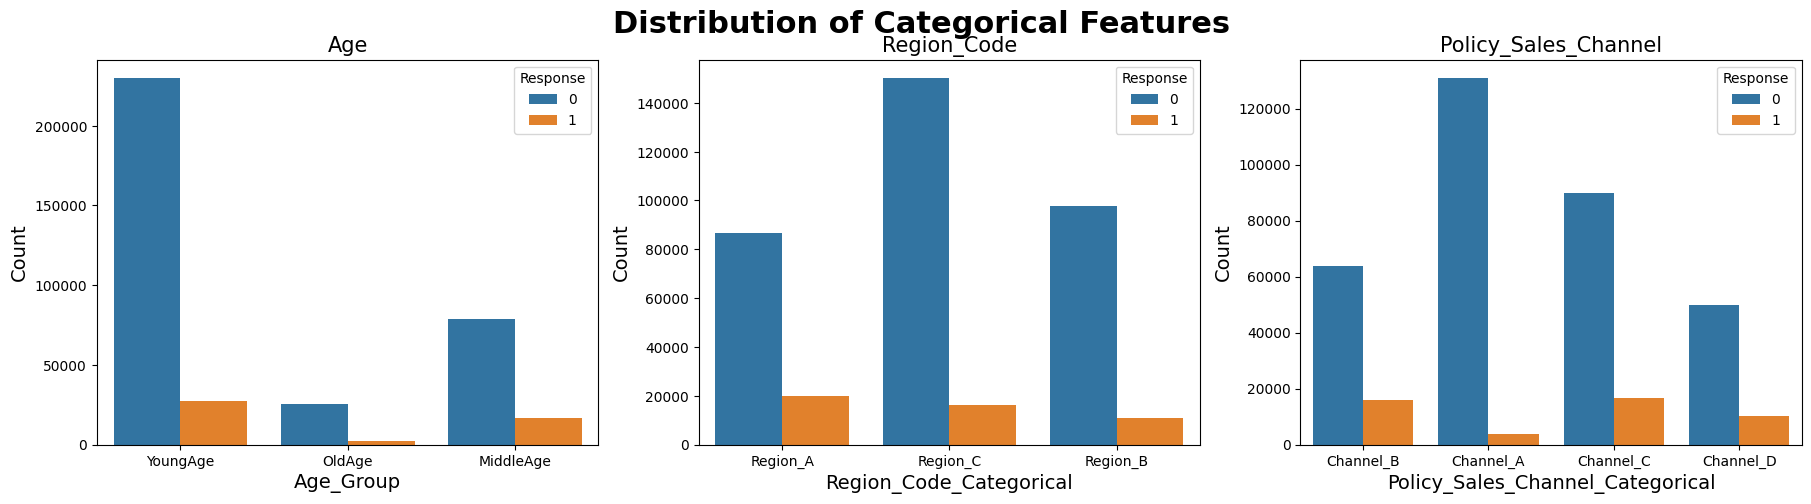

In [28]:
show_distribution_num_to_cat(df)

**Observations:**
*   We can see that Customers belonging to *YoungAge* group are more likely not interested in taking the vehicle insurance.
*   Similarly, *Region_C* and *Channel_A* Customers has the highest chances of not taking the vehicle insurance.



In [29]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Vintage_Treated,Age_Group,Policy_Sales_Channel_Categorical,Region_Code_Categorical
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0.638245,0.716263,YoungAge,Channel_B,Region_A
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0.521510,0.598616,OldAge,Channel_B,Region_C
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0.601797,0.058824,MiddleAge,Channel_B,Region_A
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0.438540,0.667820,YoungAge,Channel_A,Region_C
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0.419591,0.100346,YoungAge,Channel_A,Region_B


### **Gender Distribution**
---


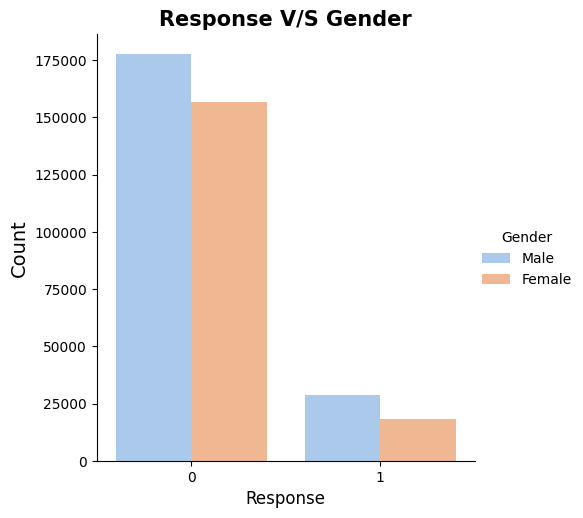

In [30]:
show_gender_response_relation(df)

- For the above plot, we can say that the no. of male customers in our data set is higher than female customers.

### **Exploring the Age Feature**
---

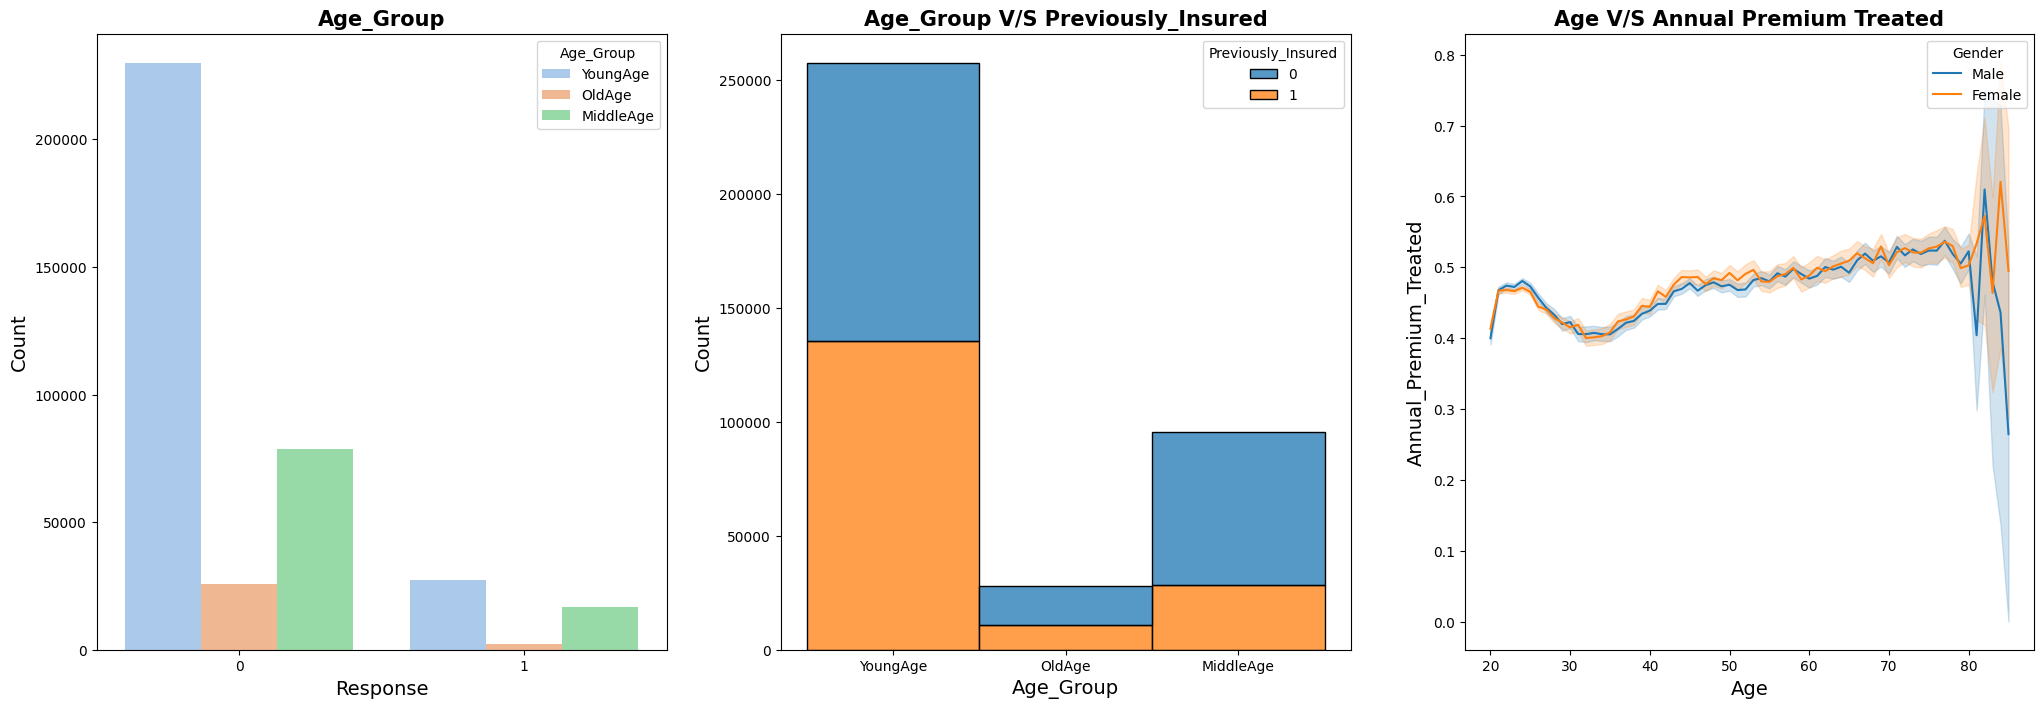

In [31]:
show_age_relations(df)

**Observation:**
- From the first plot, we can see the *Responses* received from the different *Age_Group*.
- Second plot shows the number of customers of different age group having or not having vehicle insurance.
- We can say that the customers of *YoungAge* and *OldAge* are equally likely to have/not have vehicle insurance whereas customers of *MiddleAge* has the highest chances of not having a previously insured vehicle insurance.
- From the third plot, we can see the relation between *Age* and their *Annual_Premium* for both Male and Female customers.

### **Exploring Vehicle Damage**
---

In [32]:
vehicle_damage_distribution(df)

Output hidden; open in https://colab.research.google.com to view.

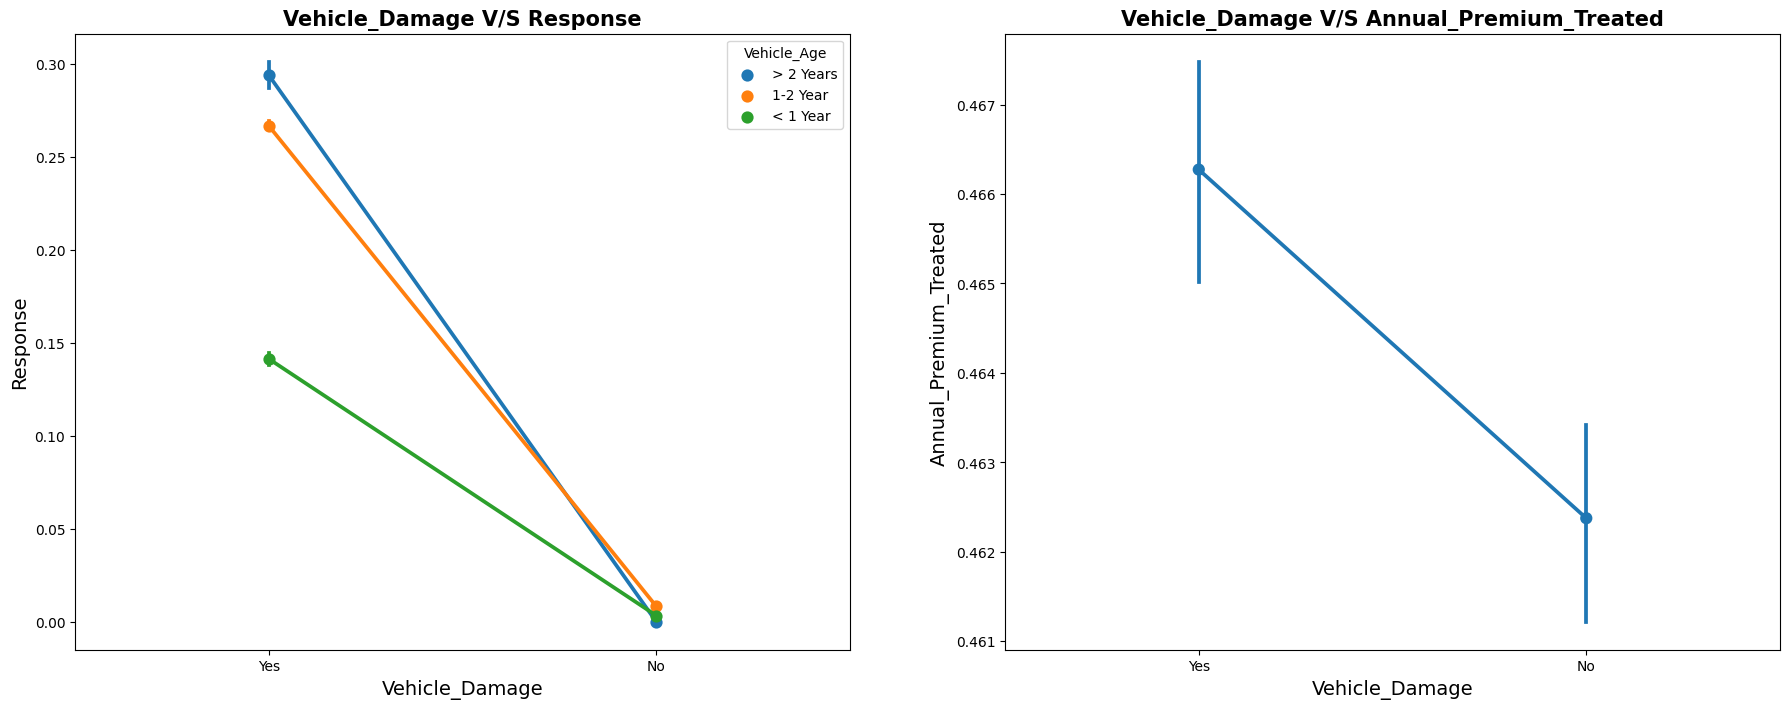

In [33]:
show_vechile_damage_relations(df)

**Observations:**
- *Pie* plot shows the number of customers whose vehicle are damaged/not damaged and they took the insurance.
- From the first *point* plot, we can say that the chances of taking a vehicle insurance is higher if vehicle is damaged irrespective of *VehicleAge* group. With the increase in vehicle age, the chances of taking vehicle insurance also increases.
- The second point plot says that the *Annual_Premium* is comparetively higher for customers with damaged vehicle.

### **Exploring Vehicle Age Feature**
---

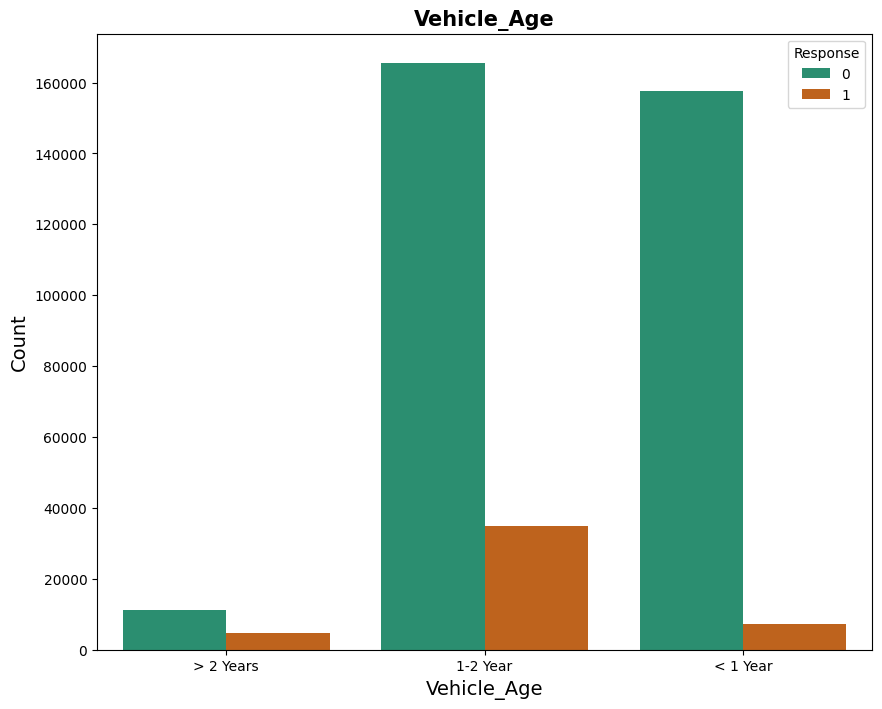

In [34]:
vehicle_age_distribution(df)

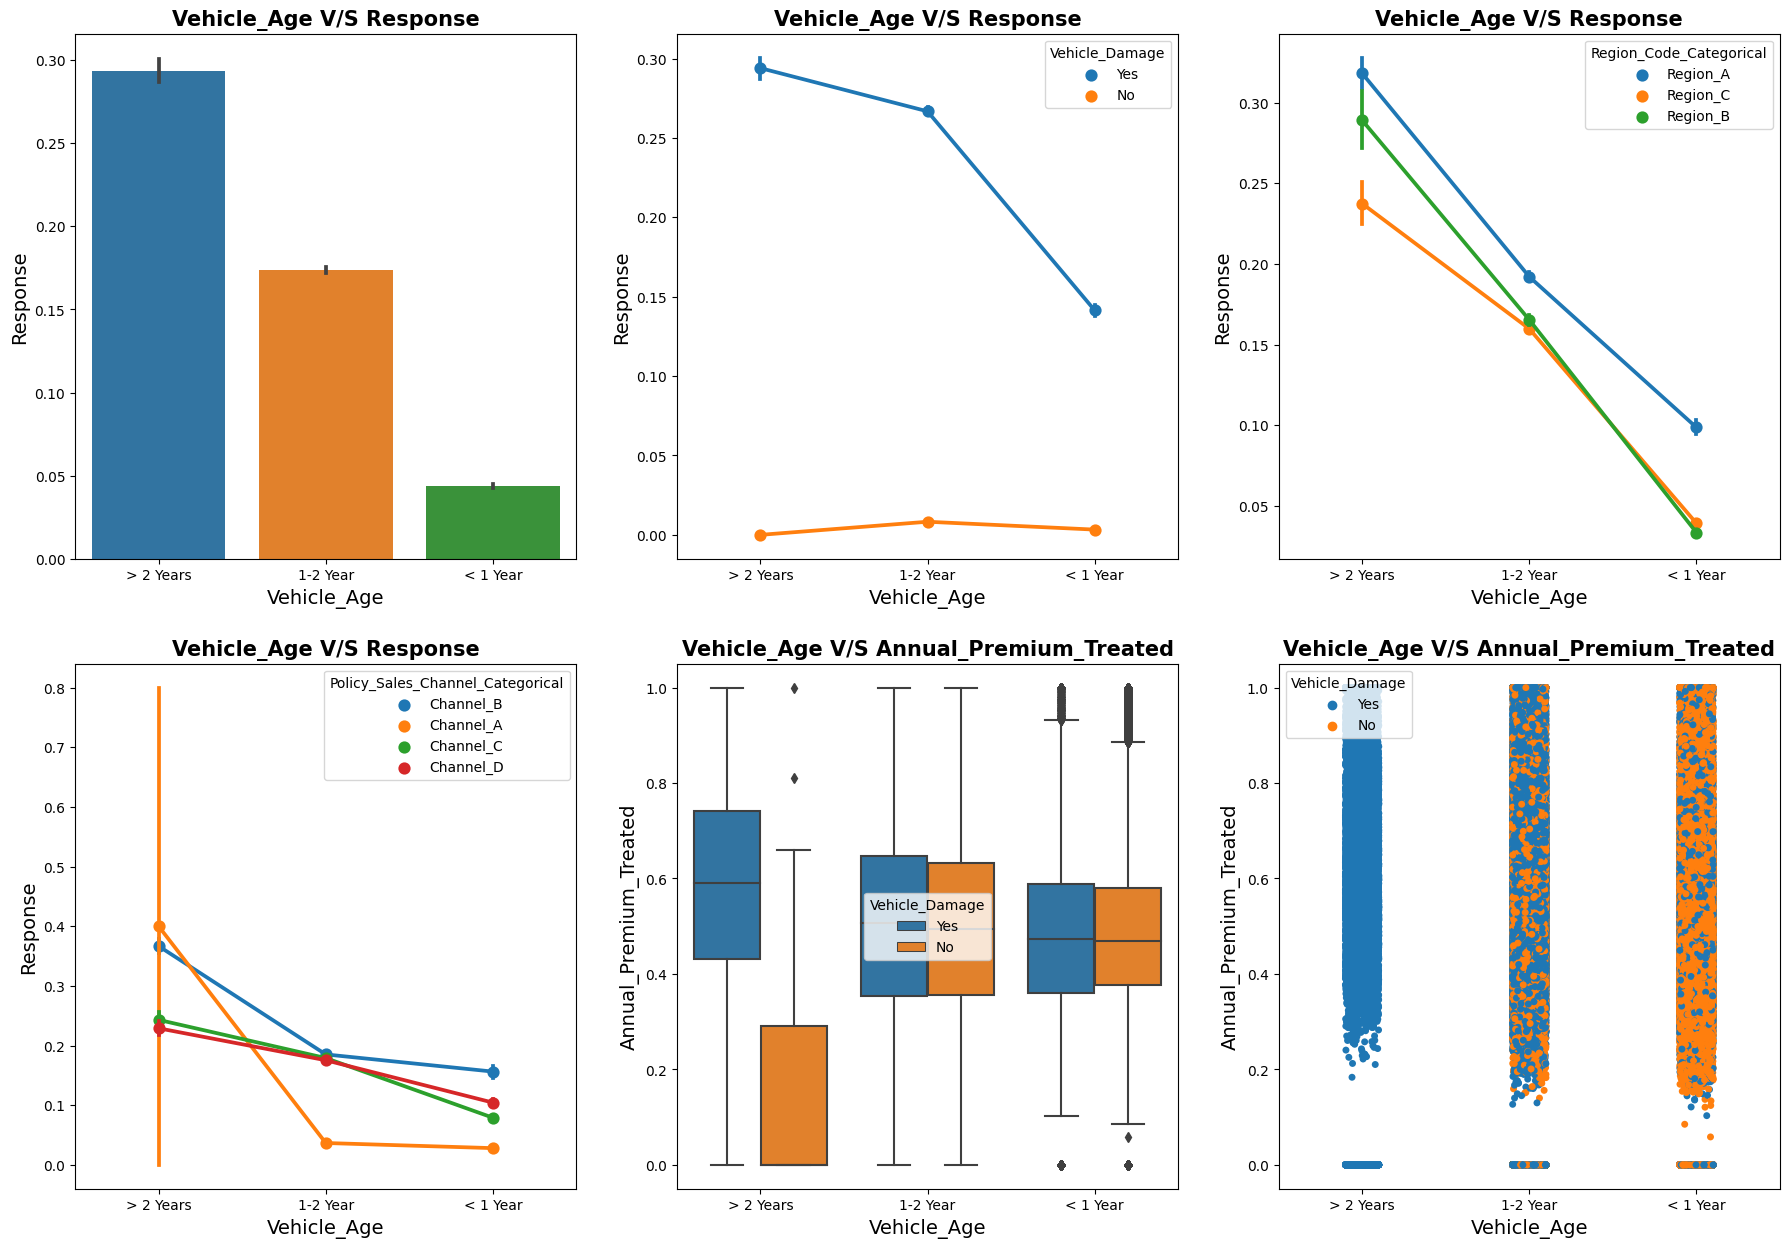

In [35]:
show_vehicle_age_relation(df)

**Observations:**
- From the first bar plot, we can see the number of customers of *VehicleAge* group, took/didn't take the vehicle insurance.
- The first two plots of the above grid shows the possibility of taking vehicle insurance belonging to a particular *VehicleAge* group.
- The third plot of the above grid shows the possibility of taking vehicle insurance belonging to a particular *VehicleAge* group based on their *RegionCode*.
- The fourth plot of the above grid shows the possibility of taking vehicle insurance belonging to a particular *VehicleAge* group based on their *PolicySalesChannel* group.
- From the box plot of the above grid, we can see the relation of Vehicle_Age group and Annual_Premium based on their Vehicle_Damage response.
- The strip plot shows that the customers having vehicle age >2 Years have the higher chances of taking vehicle insurance.

### **Exploring Annual Premium**
---

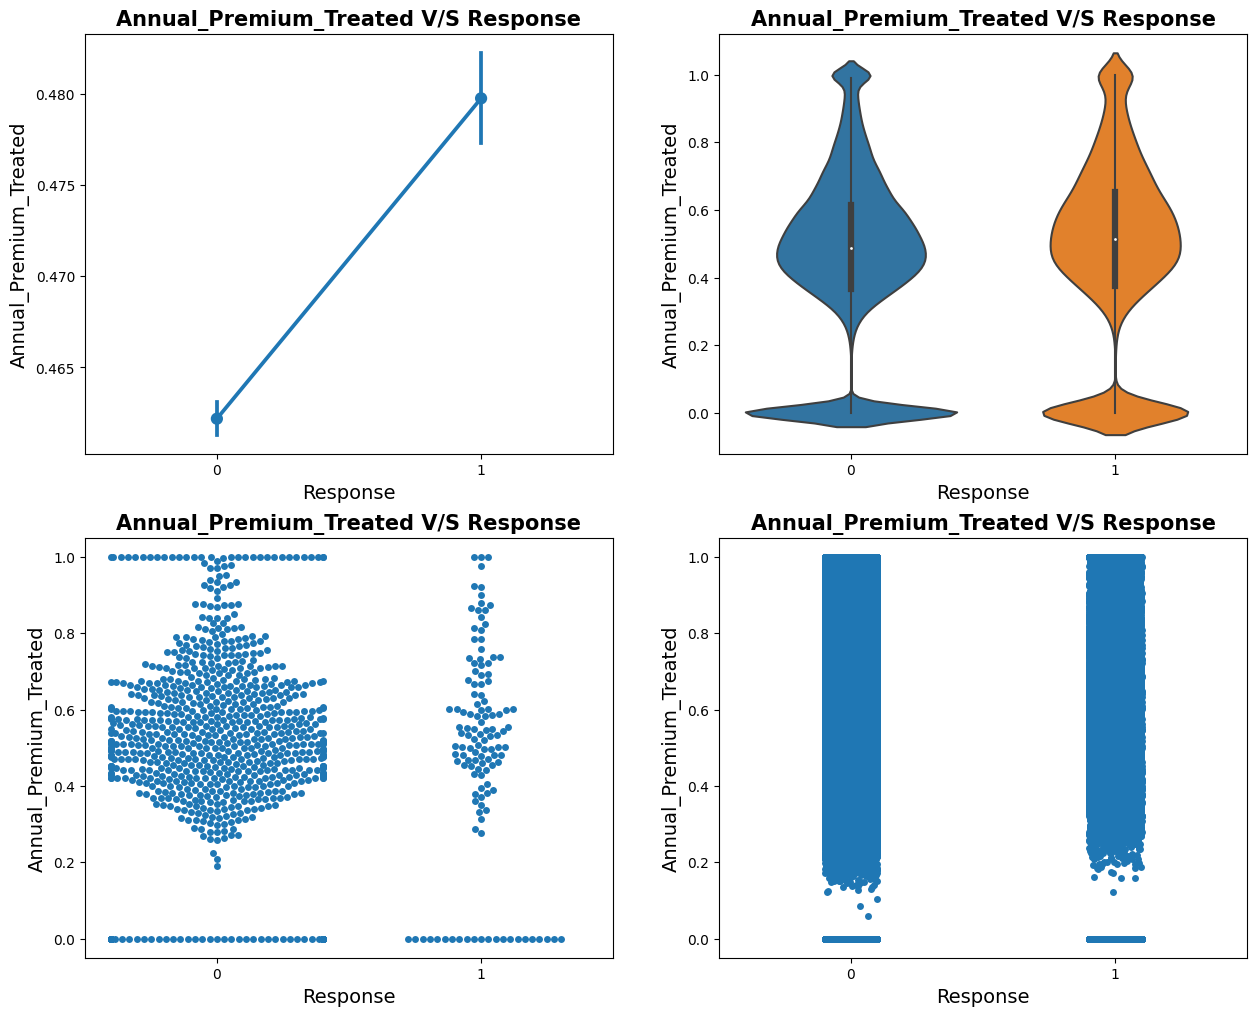

In [36]:
show_annual_premium_relation(df)

**Observations:**
- From the point plot, we can say that if the *Annual_Premium* is more then they are more likely to take the vehicle insurance.
- Second plot also shows the same thing with violin plot.
- Third plot shows the plattern of responses based on *Annual_Premium*.
- Fourth plot is the strip plot for *Annual_Premium* and *Responses*.

## **Annual Premium and Age**
---

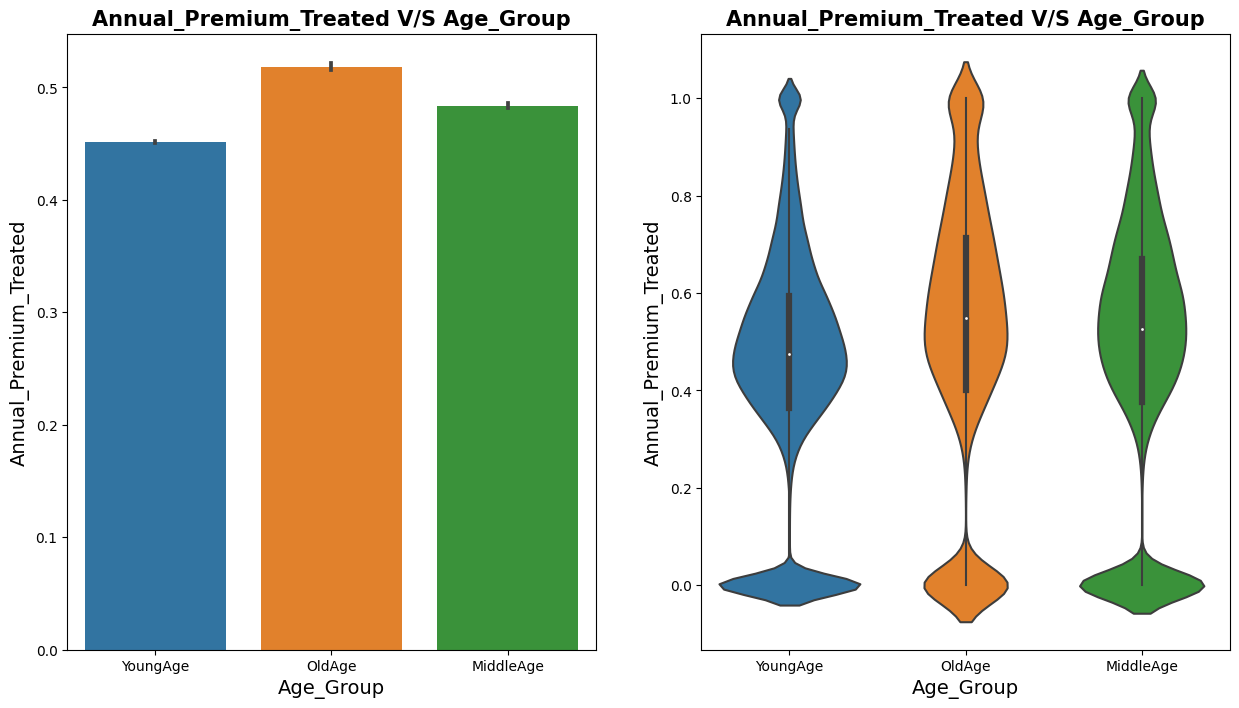

In [37]:
show_annual_premium_with_age_group(df)

- The above two plots, bar and violin, shows the distribution of *Annual_Premium* on the basis of *Age_Group*.

**Observations:**
- First plot shows the *Annual_Premium* of people based on their *Age*.
- Second plot shows the same but the data points are categorized by *Region_Code*.

## **Age Group**
---

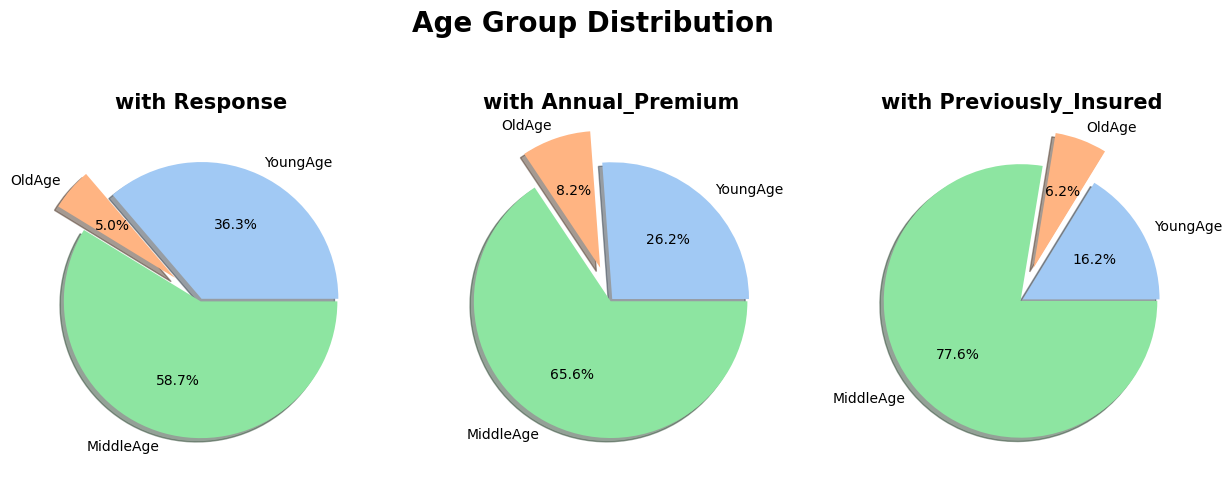

In [38]:
age_group_distribution(df)

**Observations:**
- The above three pie plots shows the distribution of Age_Group in the Data set based on *Response*, *Annual_Premium* and *Previously_Insured*.
- The above two pie plots shows the distribution of *Region_Code* in the Data set based on *Vintage* and *Annual_Premium*.

## **Exploring Policy Sales Channel**
---

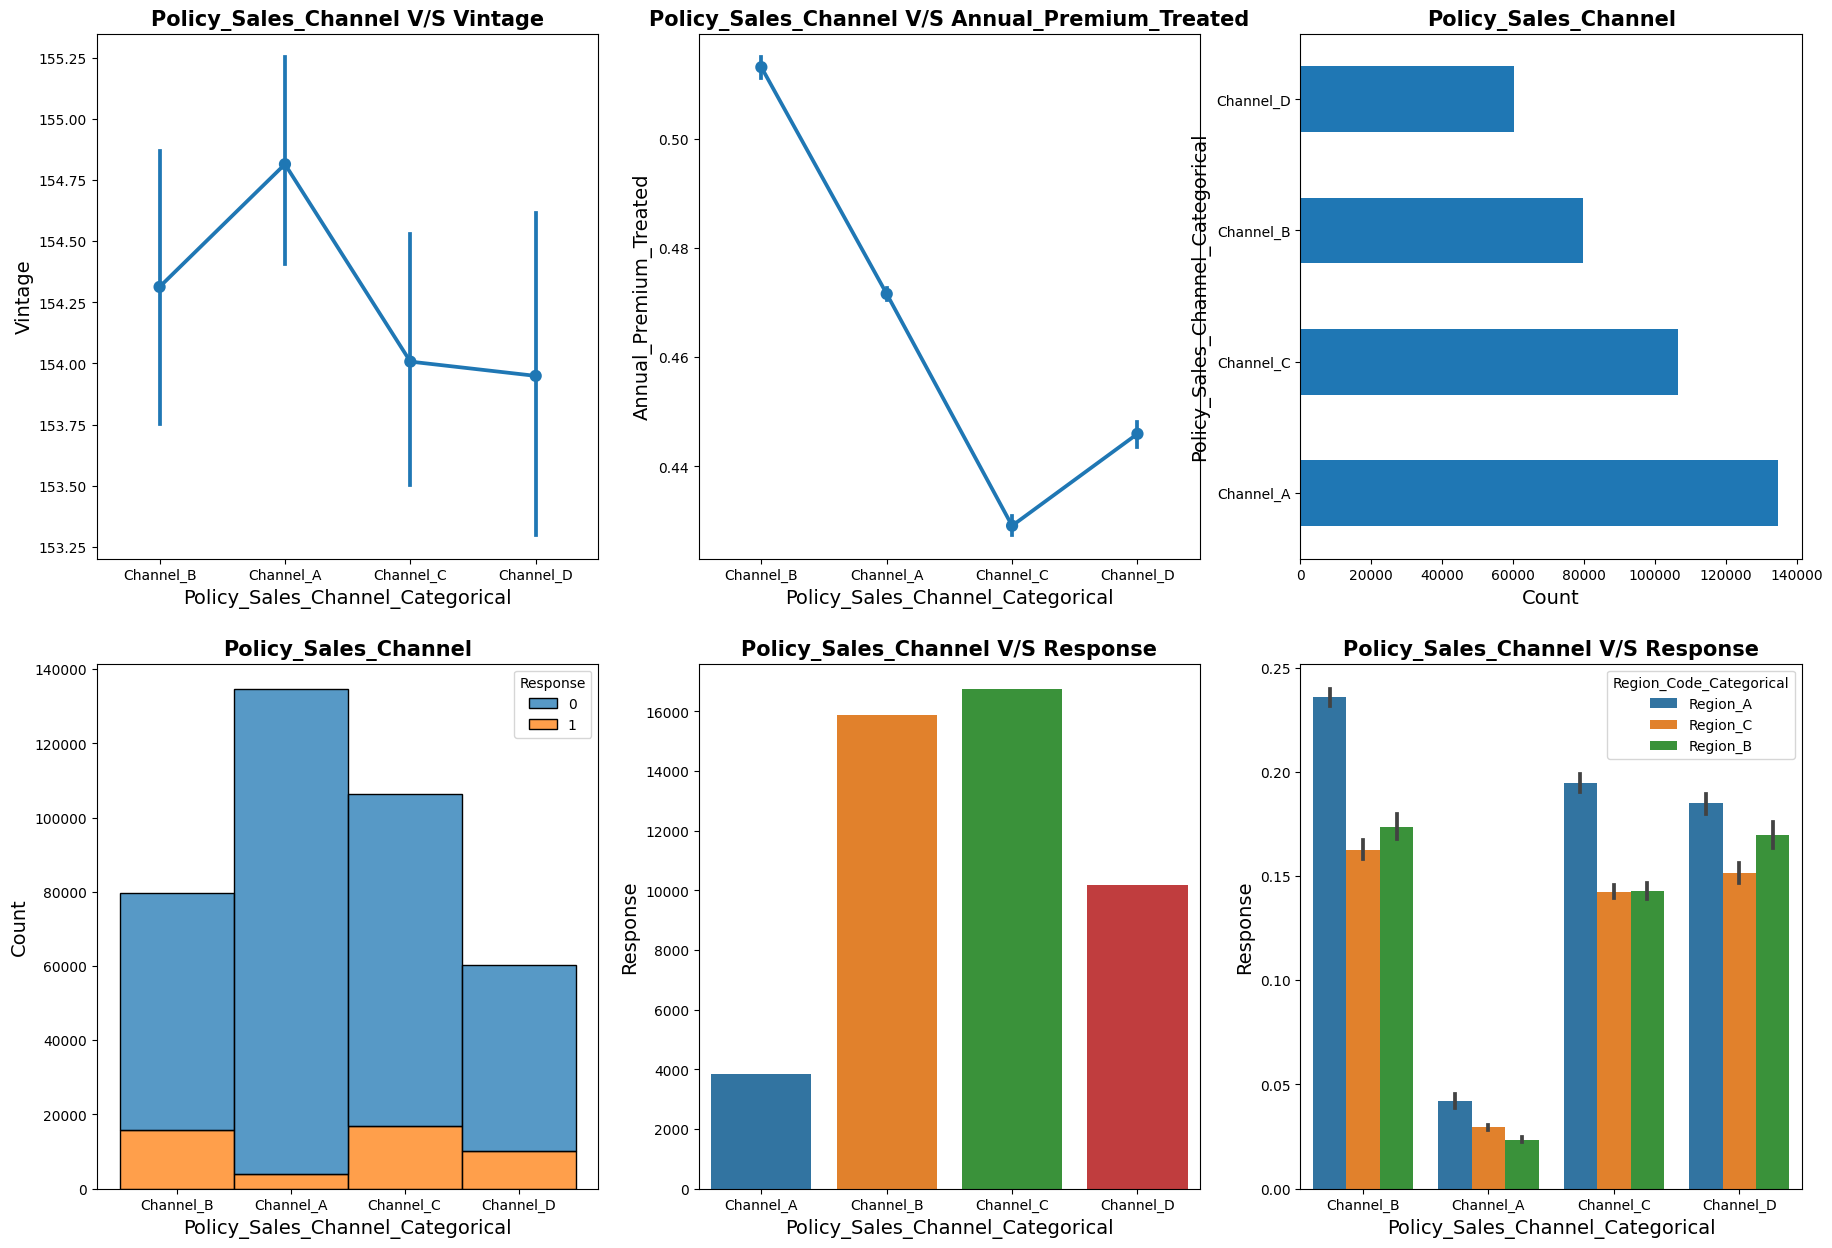

In [39]:
show_policy_sales_channel_relation(df)

**Observations:**
- The two point plots shows the distribution of *Policy_Sales_Channel* based on *Vintage* and *Annual_Premium_Treated*.
- The next three bar plots shows the number of data points belonging to a particular channel based on *Responses*.
- The last bar plot shows the probability of a customer taking vehicle insurance based on *Policy_Sales_Channel* and *Region_Code*.

### **Dropping Extra Columns**
---
- As we have already categorized 'Age', 'Region_Code', 'Annual_Premium',
'Policy_Sales_Channel', 'Vintage' features in our data set so we can now drop these features.
- We can also drop 'ID' and 'Driving_License' as they are not providing any valuable information.

In [40]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Annual_Premium_Treated',
       'Vintage_Treated', 'Age_Group', 'Policy_Sales_Channel_Categorical',
       'Region_Code_Categorical'],
      dtype='object')

In [41]:
# Dropping Unnecessary Columns
cols_to_drop = ['id', 'Age', 'Driving_License',
                'Region_Code', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']
df.drop(columns = cols_to_drop, inplace = True)

In [42]:
categorical_features = ['Gender','Age_Group','Region_Code_Categorical','Previously_Insured',
                        'Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel_Categorical']

In [43]:
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])
df['Age_Group']=encoder.fit_transform(df['Age_Group'])
df['Vehicle_Age']=encoder.fit_transform(df['Vehicle_Age'])
df['Policy_Sales_Channel_Categorical']=encoder.fit_transform(df['Policy_Sales_Channel_Categorical'])
df['Vehicle_Damage']=encoder.fit_transform(df['Vehicle_Damage'])
df['Region_Code_Categorical']=encoder.fit_transform(df['Region_Code_Categorical'])

### **Mutual Information**
Mutual information is one of many quantities that measures how much one random variables tells us about another.

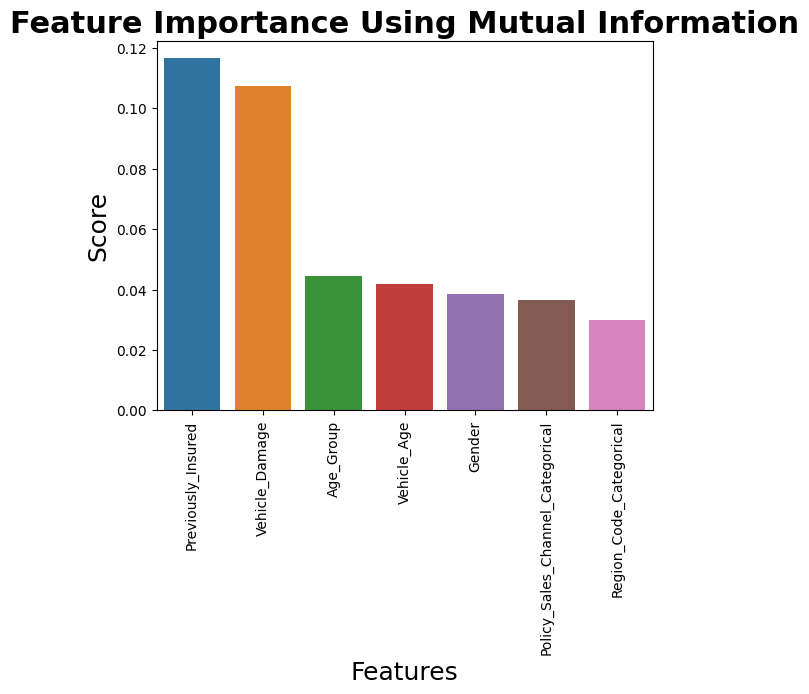

In [44]:
def mutual_info(df):
    X = df.copy()
    y = X.pop("Response")
    X.drop(columns = ['Annual_Premium_Treated','Vintage_Treated'], inplace = True)

    x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

    high_score_features = []
    feature_scores = mutual_info_classif( x_train, y_train,  random_state=0)

    column_score = {}
    columns = []
    scores = []
    for score, f_name in sorted(zip(feature_scores, x_train.columns), reverse=True):
        columns.append(f_name)
        scores.append(score)
        high_score_features.append(f_name)

    column_score['Feature'] = columns
    column_score['Score'] = scores

    return pd.DataFrame(data = column_score)

def show_feature_importance_through_mi(df):
    sns.barplot(data = mutual_info(df), x = 'Feature', y='Score')
    plt.title('Feature Importance Using Mutual Information', fontdict={'fontsize':22,'fontweight':'bold'})
    plt.xlabel('Features', fontdict={'fontsize':18})
    plt.ylabel('Score', fontdict={'fontsize':18})
    plt.xticks(rotation=90)

show_feature_importance_through_mi(df)

- From the above bar plot, we can conclude Previously_Insured is the most important feature and has the highest impact on dependent feature.

# **One-Hot Encoding**
---

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

When there is not a ordinal relationship between variables, we use One-Hot Encoding. With One-Hot Encoding the model doesn't assume a natural ordering between categories which may result in poor performance or unexpected results.

In [45]:
df.columns

Index(['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Response', 'Annual_Premium_Treated', 'Vintage_Treated', 'Age_Group',
       'Policy_Sales_Channel_Categorical', 'Region_Code_Categorical'],
      dtype='object')

In [46]:
cols_to_encode = ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
                  'Age_Group','Policy_Sales_Channel_Categorical', 'Region_Code_Categorical']

df = pd.get_dummies(data = df, columns=cols_to_encode)

*So, here we are done with the Feature Selection part of our dataset. Let's train the dataset on different Machine Learning Algorithms.*

# **Machine Learning Algorithms**
---


Let's apply different Machine Learning Models to our data set and see how each of them performs. Firstly, We will tune the hyper-parameters of those models and then we will compare and choose the best model among them, based on Elapsed Time and Evaluation Metrics of the best parameters.

List of **Machine Learning Models** we are going to train and evaluate our data set on:
- Decision Tree
- Gaussian Naive Bayes
- AdaBoost Classifier
- Bagging Classifier
- Random Forest
- Logistic Regression

###**Hyper-Parameter Tuning Methods:**

We have tried different hyper-parameter tuning methods. Every method gave the same result but GridSearchCV took lot of time so we'll go with RandomizedCV


#### **Tuning Methods:**
- RandomizedSearchCV

### **Evaluation Metrics:**
- Accuracy Score
- Auc-Roc score

*Let's get started...!*

In [48]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

List of Machine Learning Models we are going to train and evaluate our data set on:

Decision Tree

Gaussian Naive Bayes

AdaBoost Classifier

Bagging Classifier

Logistic Regression

In [49]:
def matrix(actual, predicted):
  labels = ['0','1']
  cm = confusion_matrix(actual, predicted)
  print(cm)

  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax)

  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('Actual labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

def feature_importance(optimal_model):
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)

  plt.figure(figsize=(15,25))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  pd.set_option('display.max_columns', 200)
  pd.set_option('display.max_rows', 200)
  print(importance_df.sort_values(by=['Feature Importance'],ascending=False))

In [50]:
model=[]
L_accuracy=[]
L_Auc_Roc=[]

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, random_state=23, splitter=random; total time=   0.4s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, random_state=23, splitter=random; total time=   0.2s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, random_state=23, splitter=random; total time=   0.2s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, random_state=23, splitter=random; total time=   0.3s
[CV] END max_depth=5, max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, random_state=23, splitter=random; total time=   0.3s
[CV] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, random_state=

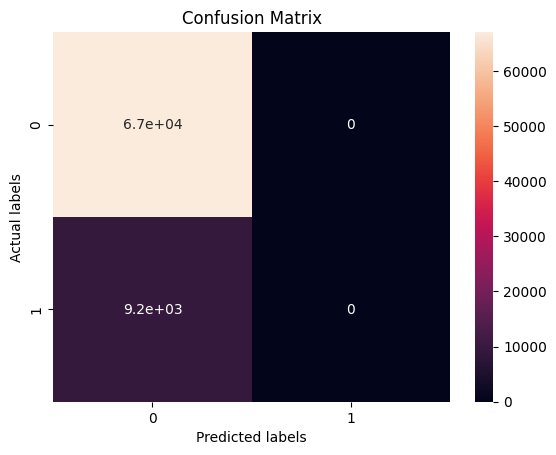

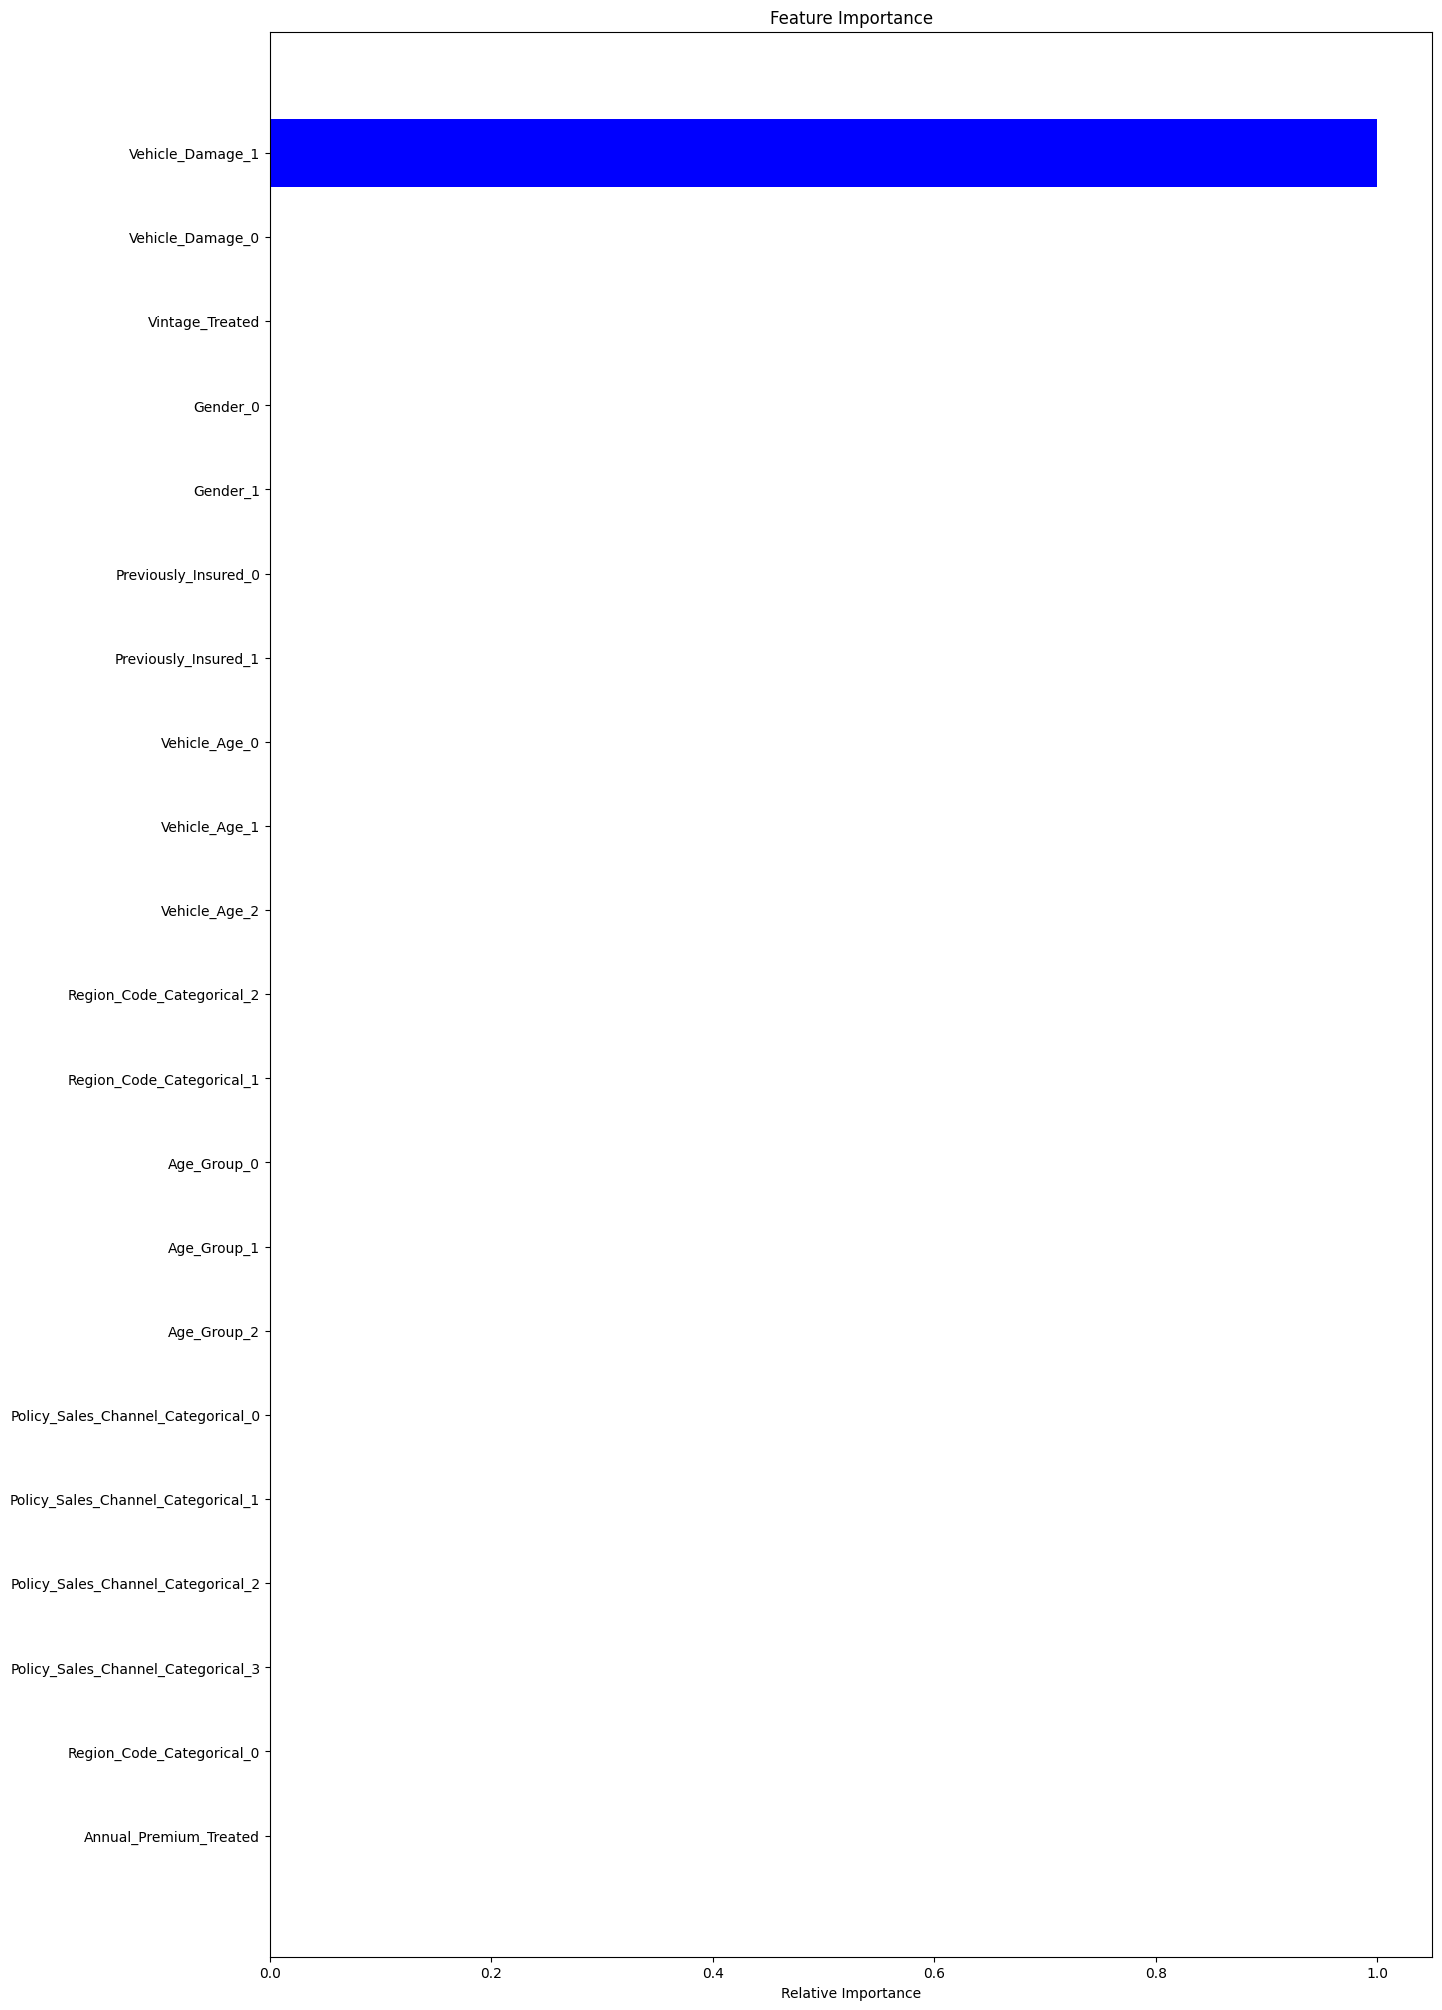

                               Feature  Feature Importance
10                    Vehicle_Damage_1                 1.0
11                         Age_Group_0                 0.0
19           Region_Code_Categorical_1                 0.0
18           Region_Code_Categorical_0                 0.0
17  Policy_Sales_Channel_Categorical_3                 0.0
16  Policy_Sales_Channel_Categorical_2                 0.0
15  Policy_Sales_Channel_Categorical_1                 0.0
14  Policy_Sales_Channel_Categorical_0                 0.0
13                         Age_Group_2                 0.0
12                         Age_Group_1                 0.0
0               Annual_Premium_Treated                 0.0
1                      Vintage_Treated                 0.0
9                     Vehicle_Damage_0                 0.0
8                        Vehicle_Age_2                 0.0
7                        Vehicle_Age_1                 0.0
6                        Vehicle_Age_0                 0

In [51]:
## Decision Tree Classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

dt_model=DecisionTreeClassifier()
parameters_dt = {"splitter":["best","random"],
            "max_depth" : [None,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.0, 0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,30,40,50,60],
           'random_state':[23]}

cv=KFold(n_splits=5, shuffle=True, random_state=42)
dt_grid = RandomizedSearchCV(dt_model, param_distributions = parameters_dt, scoring = 'accuracy', cv = cv, n_iter = 5, verbose=2)
dt_grid.fit(X_train,y_train)
dt_optimal_model=dt_grid.best_estimator_
y_pred=dt_optimal_model.predict(X_test)

## evaluation
accuracy= accuracy_score(y_test,y_pred)
roc_score = roc_auc_score(y_test, y_pred)
model.append('DTC')
L_accuracy.append(accuracy)
L_Auc_Roc.append(roc_score)
print(accuracy)
print(roc_score)

## Confusion_Matrix
matrix(y_test,y_pred)

##  Feature Importance
feature_importance(dt_optimal_model)

0.8796935268032852
0.5
[[67052     0]
 [ 9170     0]]
[[67052     0]
 [ 9170     0]]


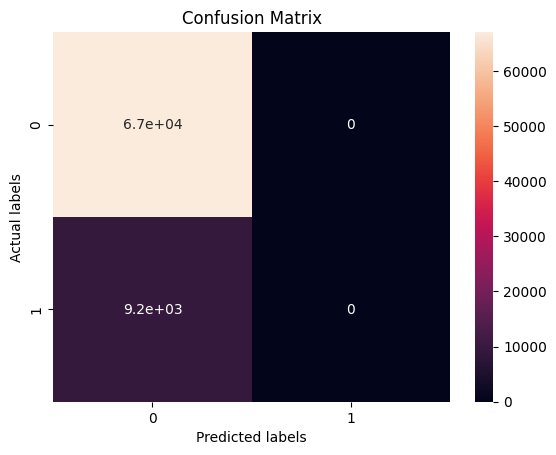

In [52]:
#Logistic Regression

x=df.iloc[:,1:]
y=df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)
cv=KFold(n_splits=5, shuffle=True, random_state=42)

scores_accuracy = cross_val_score(lr_model, x, y, cv=cv, scoring='accuracy')
scores_precision = cross_val_score(lr_model, x, y, cv=cv, scoring='precision')

lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)


## Evaluation Metric
accuracy=accuracy_score(y_test,y_pred)
roc_score = roc_auc_score(y_test, y_pred)
model.append('LR')
L_accuracy.append(accuracy)
L_Auc_Roc.append(roc_score)
print(accuracy)
print(roc_score)
## Confusion_Matrix
matrix(y_test,y_pred)

## Confusion_Matrix
matrix(y_test,y_pred)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.2s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.2s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.2s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.2s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.2s
[CV] END ................var_smoothing=0.0001232846739442066; total time=   0.2s
[CV] END ................var_smoothing=0.0001232846739442066; total time=   0.2s
[CV] END ................var_smoothing=0.0001232846739442066; total time=   0.2s
[CV] END ................var_smoothing=0.0001232846739442066; total time=   0.2s
[CV] END ................var_smoothing=0.0001232846739442066; total time=   0.3s
[CV] END ..................var_smoothing=0.12328467394420659; total time=   0.2s
[CV] END ..................var_smoothing=0.123284

array([[0.46227821, 0.49960621, 0.46861195, 0.53138805, 0.47842317,
        0.52157683, 0.49509813, 0.47097218, 0.03392969, 0.56056361,
        0.43943639, 0.23558147, 0.0772741 , 0.68714442, 0.39171938,
        0.19087553, 0.26752498, 0.14988012, 0.25878353, 0.2924065 ,
        0.44880997],
       [0.4805977 , 0.49805909, 0.38854555, 0.61145445, 0.99664358,
        0.00335642, 0.74461907, 0.15484816, 0.10053277, 0.02061801,
        0.97938199, 0.36222696, 0.04997336, 0.58779968, 0.08292488,
        0.3393447 , 0.36036228, 0.21736814, 0.42589238, 0.22911561,
        0.34499201]])

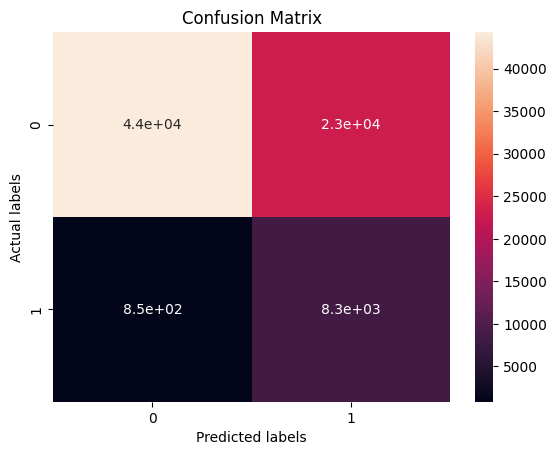

In [53]:
#GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

G_NB_model=GaussianNB()
parameters_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

cv=KFold(n_splits=5, shuffle=True, random_state=42)
G_NB_grid = RandomizedSearchCV(G_NB_model, param_distributions = parameters_NB, scoring = 'accuracy', cv = cv, n_iter = 5, verbose=2)
G_NB_grid.fit(X_train,y_train)
G_NB_optimal_model=G_NB_grid.best_estimator_
y_pred=G_NB_optimal_model.predict(X_test)

## Evaluation Metric
accuracy=accuracy_score(y_test,y_pred)
roc_score = roc_auc_score(y_test, y_pred)
model.append('G_NB')
L_accuracy.append(accuracy)
L_Auc_Roc.append(roc_score)
print(accuracy)
print(roc_score)

## Confusion_Matrix
matrix(y_test,y_pred)

##  Feature Importance
G_NB_optimal_model.theta_


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END learning_rate=0.001, n_estimators=100, random_state=2; total time=  23.1s
[CV] END learning_rate=0.001, n_estimators=100, random_state=2; total time=  22.0s
[CV] END learning_rate=0.001, n_estimators=100, random_state=2; total time=  23.2s
[CV] END learning_rate=0.001, n_estimators=100, random_state=2; total time=  22.2s
[CV] END learning_rate=0.001, n_estimators=100, random_state=2; total time=  23.8s
[CV] END learning_rate=0.01, n_estimators=100, random_state=2; total time=  22.3s
[CV] END learning_rate=0.01, n_estimators=100, random_state=2; total time=  23.5s
[CV] END learning_rate=0.01, n_estimators=100, random_state=2; total time=  22.6s
[CV] END learning_rate=0.01, n_estimators=100, random_state=2; total time=  22.1s
[CV] END learning_rate=0.01, n_estimators=100, random_state=2; total time=  22.4s
[CV] END learning_rate=0.01, n_estimators=50, random_state=2; total time=  11.1s
[CV] END learning_rate=0.01, n_est

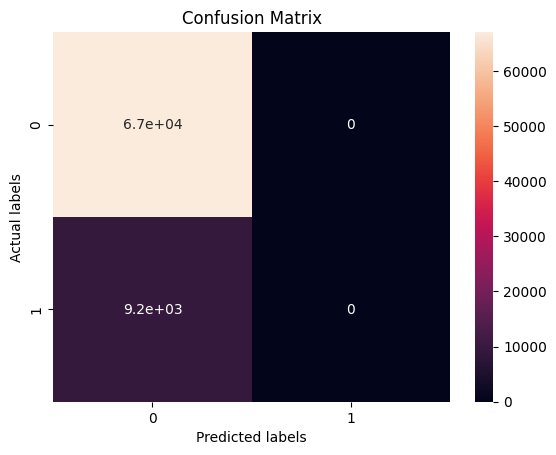

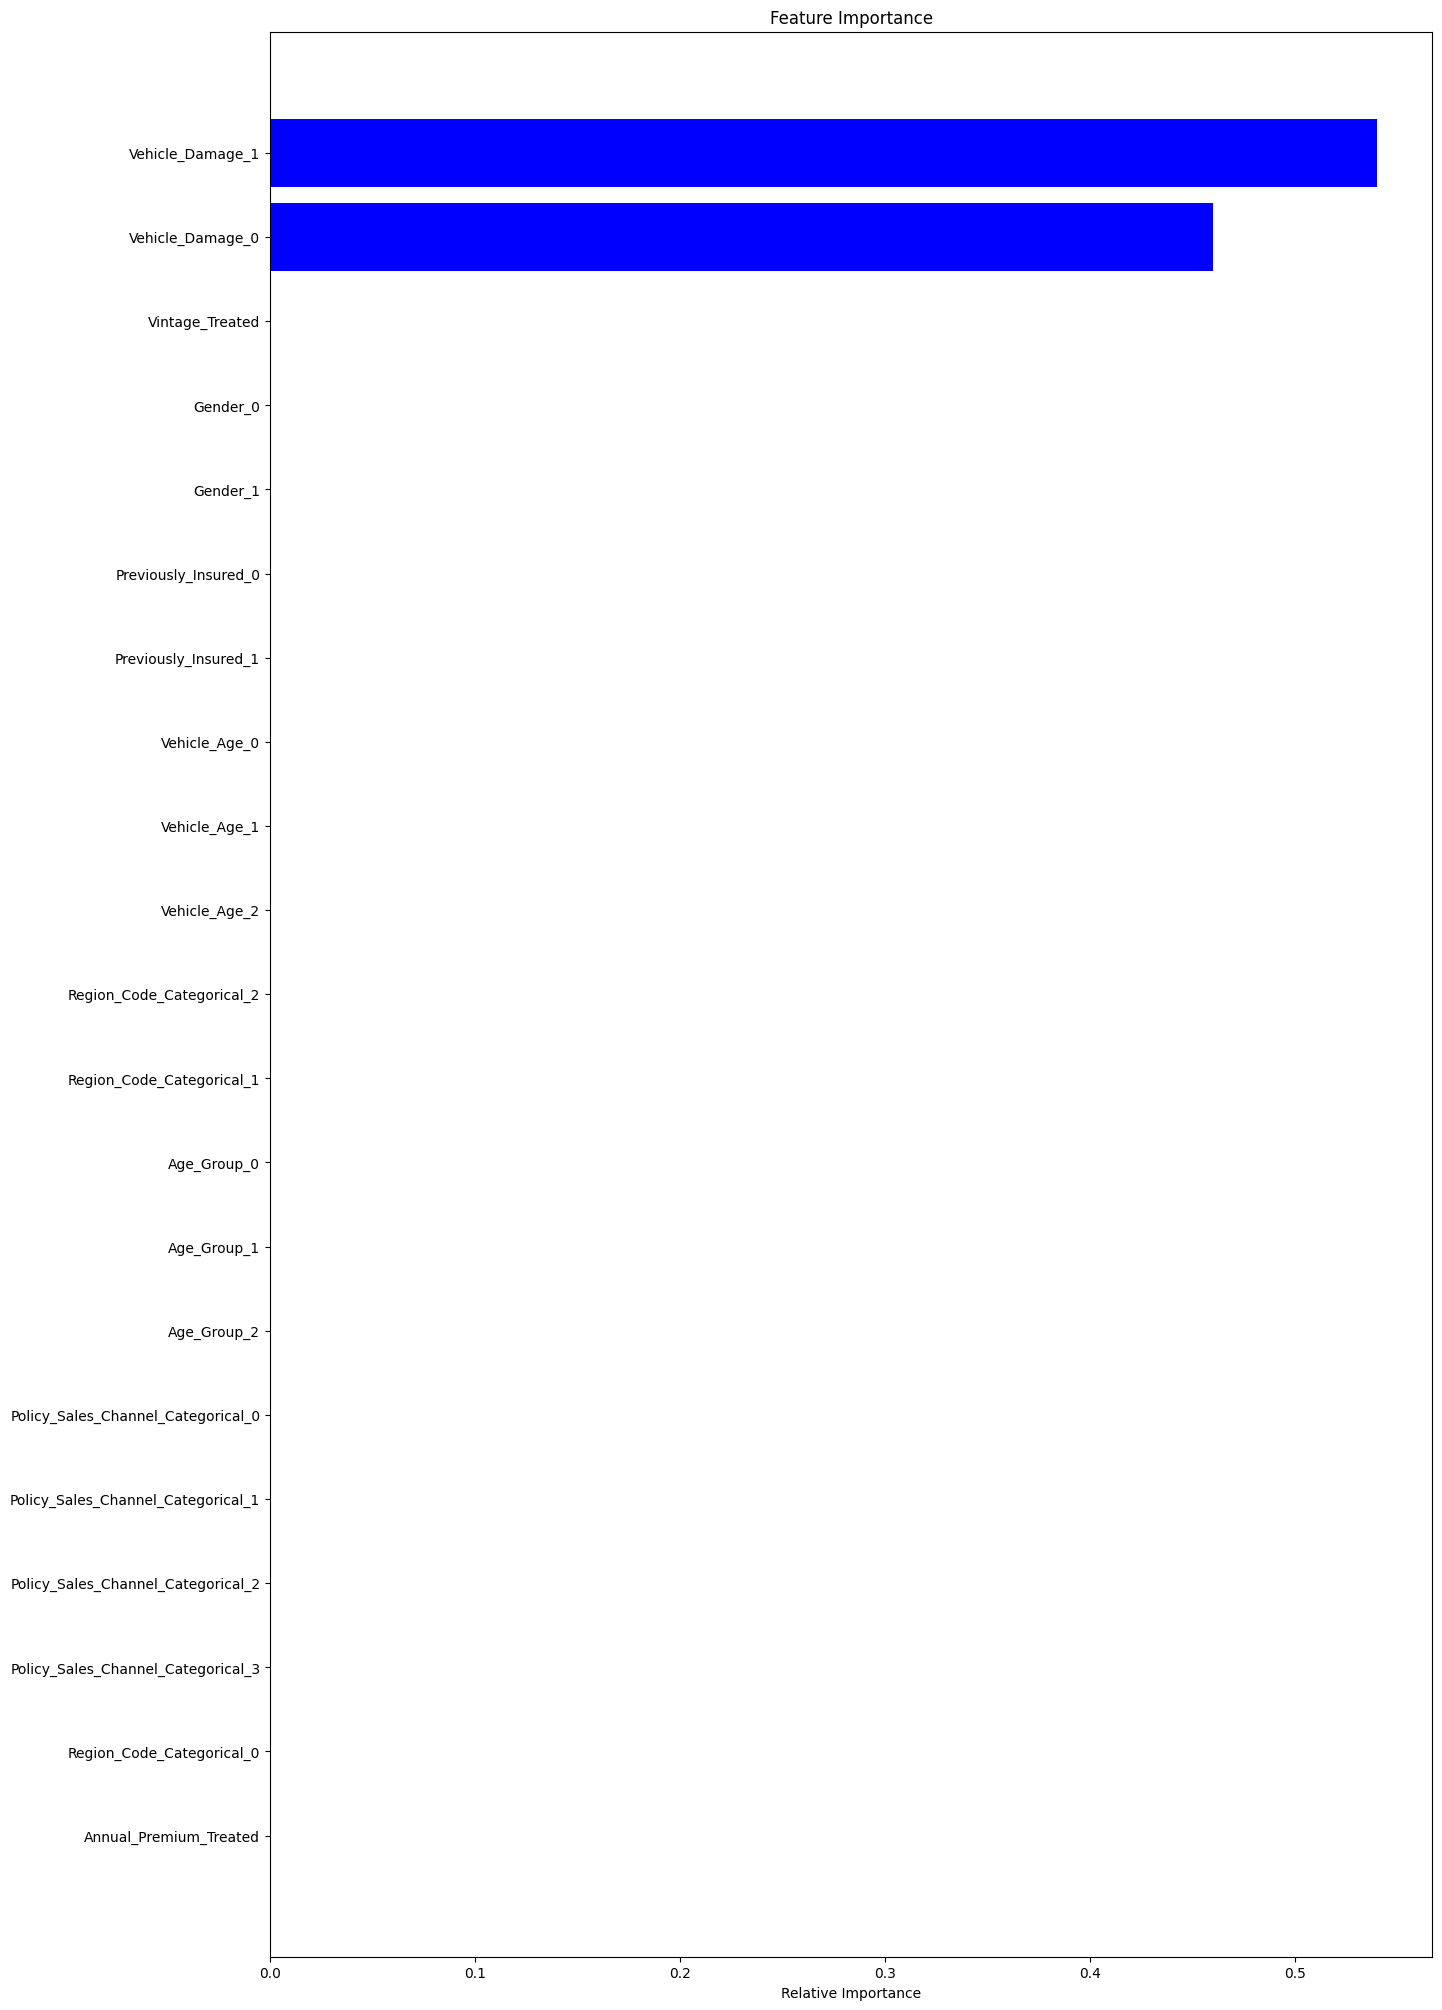

                               Feature  Feature Importance
10                    Vehicle_Damage_1                0.54
9                     Vehicle_Damage_0                0.46
11                         Age_Group_0                0.00
19           Region_Code_Categorical_1                0.00
18           Region_Code_Categorical_0                0.00
17  Policy_Sales_Channel_Categorical_3                0.00
16  Policy_Sales_Channel_Categorical_2                0.00
15  Policy_Sales_Channel_Categorical_1                0.00
14  Policy_Sales_Channel_Categorical_0                0.00
13                         Age_Group_2                0.00
12                         Age_Group_1                0.00
0               Annual_Premium_Treated                0.00
1                      Vintage_Treated                0.00
8                        Vehicle_Age_2                0.00
7                        Vehicle_Age_1                0.00
6                        Vehicle_Age_0                0.

In [54]:
#AdaBoost

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

adb_model=AdaBoostClassifier()
parameters_ada = {'n_estimators':[50, 100, 200,400],
              'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.5],
              'random_state':[2]
                  }
cv=KFold(n_splits=5, shuffle=True, random_state=42)
adb_grid= RandomizedSearchCV(adb_model, param_distributions = parameters_ada, scoring = 'accuracy', refit=True,cv = cv, n_iter = 5, verbose=2)
adb_grid.fit(X_train,y_train)
adb_optimal_model=adb_grid.best_estimator_
y_pred=adb_optimal_model.predict(X_test)

## Evaluation Metric
accuracy=accuracy_score(y_test,y_pred)
roc_score = roc_auc_score(y_test, y_pred)
model.append('adb')
L_accuracy.append(accuracy)
L_Auc_Roc.append(roc_score)
print(accuracy)
print(roc_score)


## Confusion_Matrix
matrix(y_test,y_pred)

##  Feature Importance
feature_importance(adb_optimal_model)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ...................n_estimators=10, random_state=26; total time=  13.2s
[CV] END ...................n_estimators=10, random_state=26; total time=  13.6s
[CV] END ...................n_estimators=10, random_state=26; total time=  12.2s
[CV] END ...................n_estimators=10, random_state=26; total time=  12.4s
[CV] END ...................n_estimators=10, random_state=26; total time=  12.7s
[CV] END ...................n_estimators=50, random_state=26; total time= 1.1min
[CV] END ...................n_estimators=50, random_state=26; total time= 1.1min
[CV] END ...................n_estimators=50, random_state=26; total time= 1.0min
[CV] END ...................n_estimators=50, random_state=26; total time= 1.0min
[CV] END ...................n_estimators=50, random_state=26; total time= 1.1min
[CV] END ..................n_estimators=100, random_state=26; total time= 2.1min
[CV] END ..................n_estimators=100, rand

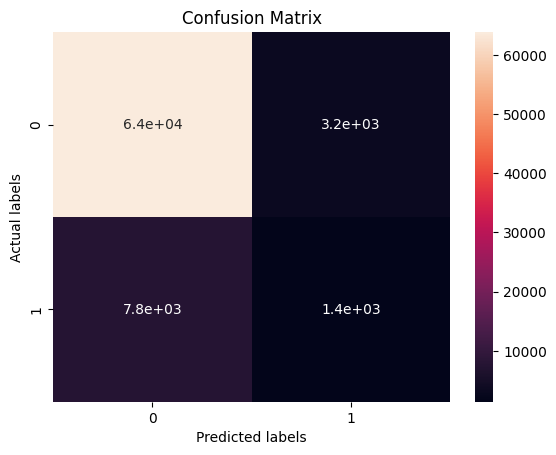

In [55]:
#Bagging Classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

bgc_model=BaggingClassifier()
parameters_bagging = {'n_estimators':[10, 50, 100],
                      'random_state':[26]}
cv=KFold(n_splits=5, shuffle=True, random_state=42)
bgc_grid = RandomizedSearchCV(bgc_model, param_distributions = parameters_bagging, refit=True, scoring = 'accuracy', cv = cv, n_iter = 5, verbose=2)
bgc_grid.fit(X_train,y_train)
bgc_optimal_model=bgc_grid.best_estimator_
y_pred=bgc_optimal_model.predict(X_test)

## Evaluation Metric
accuracy=accuracy_score(y_test,y_pred)
roc_score = roc_auc_score(y_test, y_pred)
model.append('bgc')
L_accuracy.append(accuracy)
L_Auc_Roc.append(roc_score)
print(accuracy)
print(roc_score)

## Confusion_Matrix
matrix(y_test,y_pred)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=19, min_samples_split=6, n_estimators=119, random_state=26; total time=  41.9s
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=19, min_samples_split=6, n_estimators=119, random_state=26; total time=  47.0s
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=19, min_samples_split=6, n_estimators=119, random_state=26; total time=  41.6s
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=19, min_samples_split=6, n_estimators=119, random_state=26; total time=  42.2s
[CV] END bootstrap=False, max_depth=14, max_features=sqrt, min_samples_leaf=19, min_samples_split=6, n_estimators=119, random_state=26; total time=  42.6s
[CV] END bootstrap=False, max_depth=14, max_features=None, min_samples_leaf=19, min_samples_split=6, n_estimators=119, random_state=26; total time= 2.5min
[CV] END b

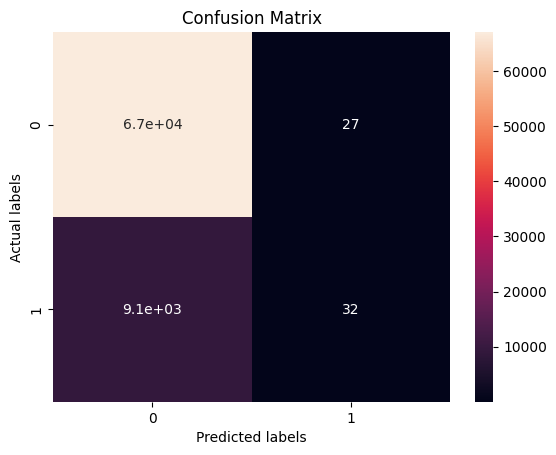

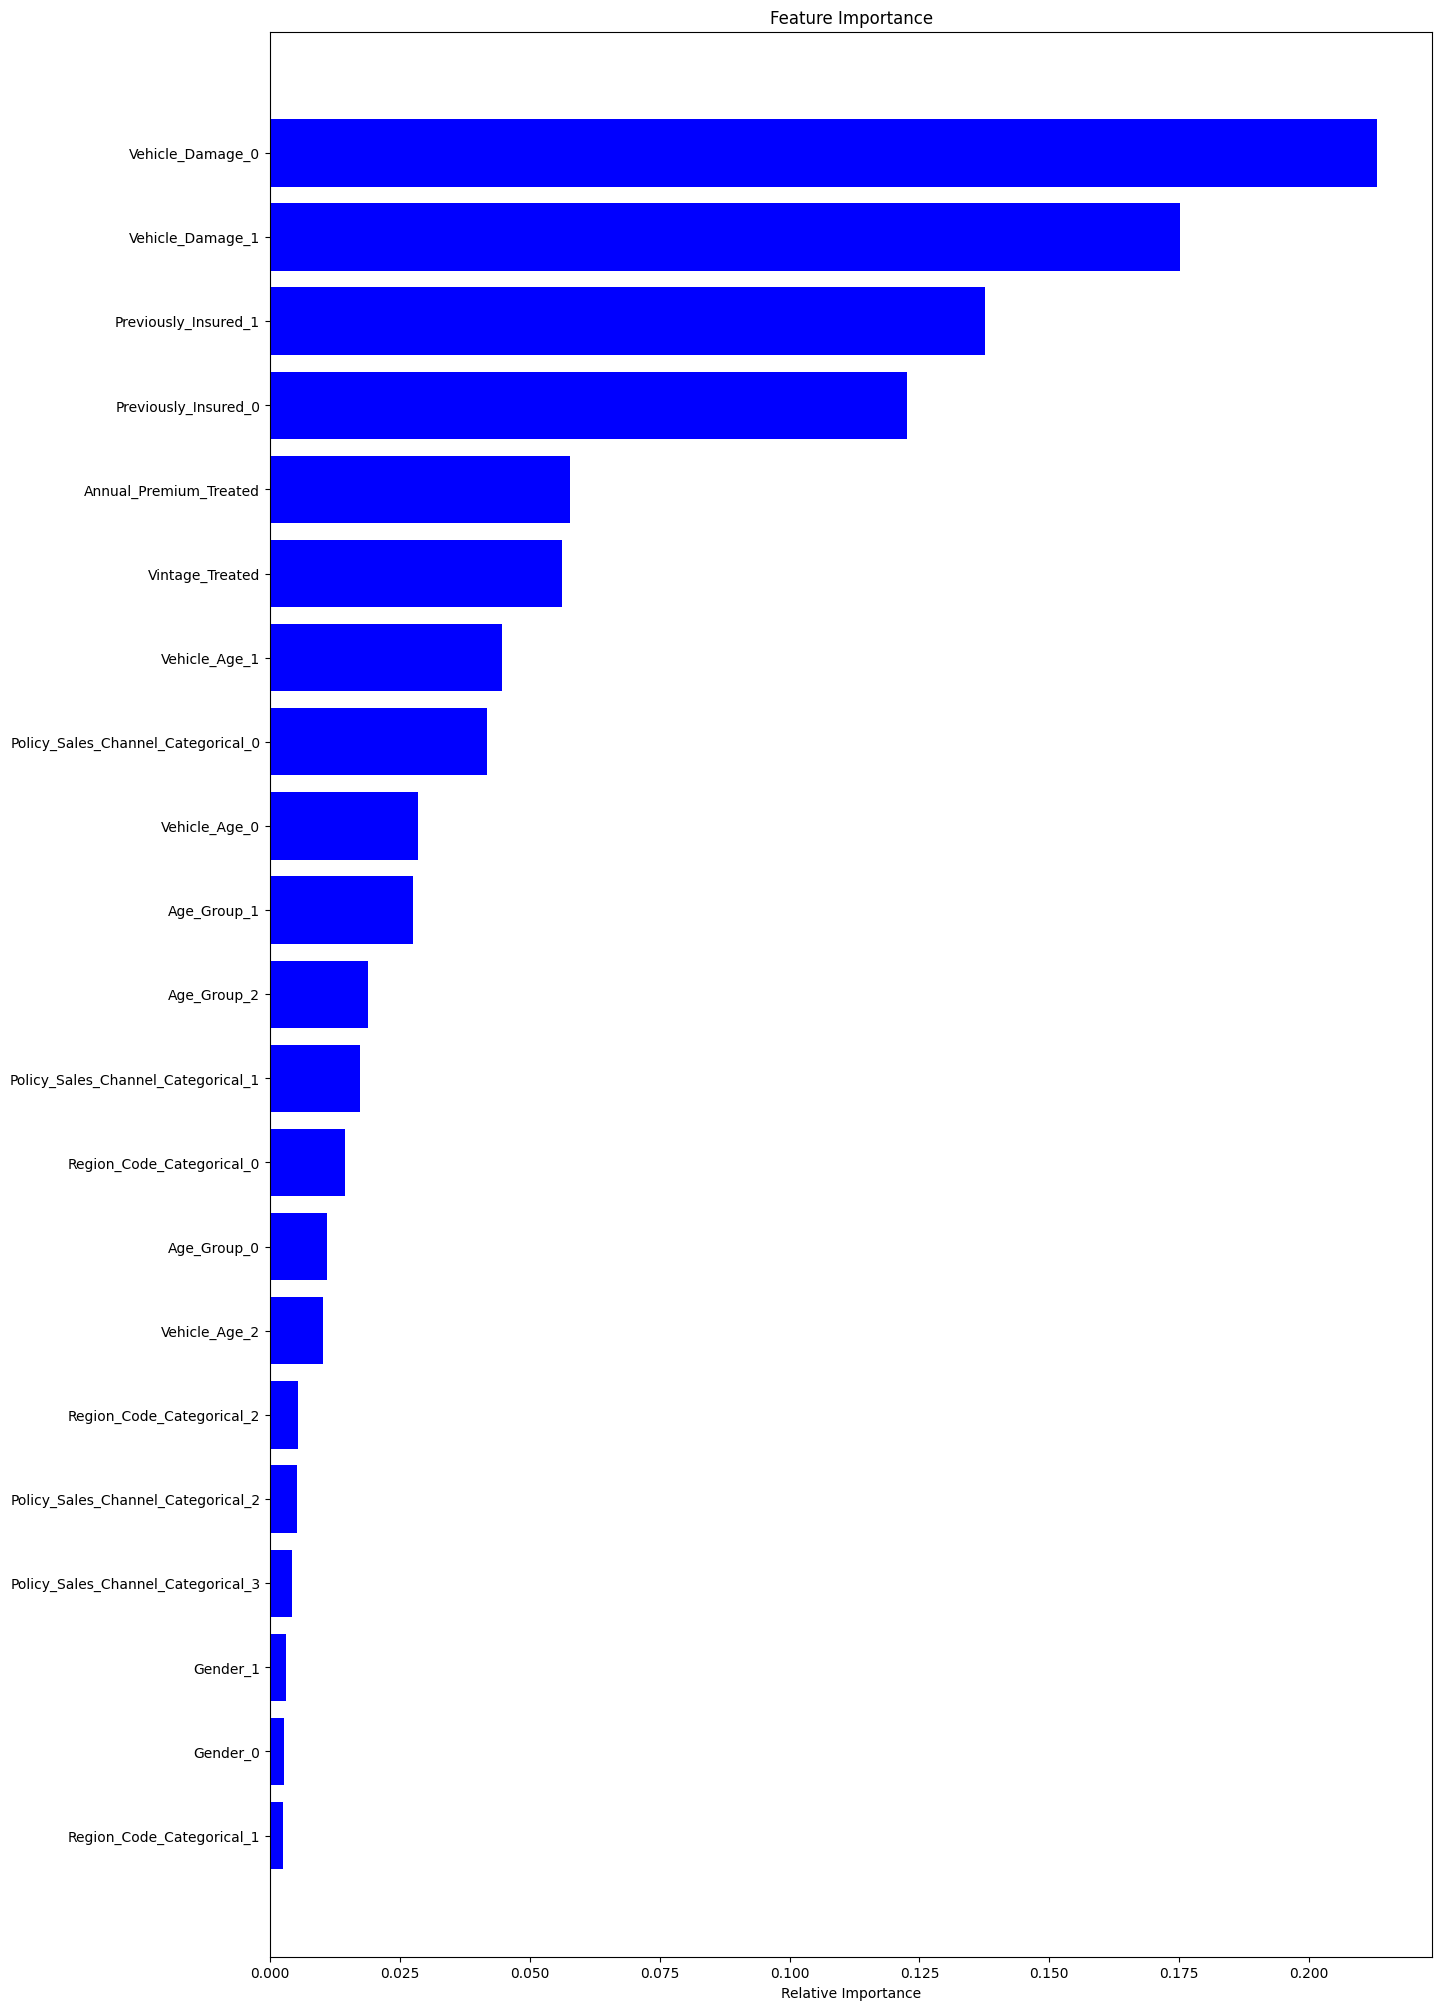

                               Feature  Feature Importance
9                     Vehicle_Damage_0                0.21
10                    Vehicle_Damage_1                0.18
5                 Previously_Insured_1                0.14
4                 Previously_Insured_0                0.12
1                      Vintage_Treated                0.06
0               Annual_Premium_Treated                0.06
7                        Vehicle_Age_1                0.04
14  Policy_Sales_Channel_Categorical_0                0.04
6                        Vehicle_Age_0                0.03
12                         Age_Group_1                0.03
13                         Age_Group_2                0.02
15  Policy_Sales_Channel_Categorical_1                0.02
8                        Vehicle_Age_2                0.01
11                         Age_Group_0                0.01
16  Policy_Sales_Channel_Categorical_2                0.01
18           Region_Code_Categorical_0                0.

In [56]:
# Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rf_classifier = RandomForestClassifier()
from random import randint
parameters_rf = {
    'n_estimators': [randint(10, 200)],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [randint(1, 20)],
    'min_samples_split': [randint(2, 20)],
    'min_samples_leaf': [randint(1, 20)],
    'bootstrap': [True, False],
    'random_state':[26]
}
cv=KFold(n_splits=5, shuffle=True, random_state=42)
rf_grid = RandomizedSearchCV(rf_classifier, param_distributions = parameters_rf, refit=True, scoring = 'accuracy', cv = cv, n_iter = 5, verbose=2)
rf_grid.fit(X_train,y_train)
rf_optimal_model = rf_grid.best_estimator_
y_pred=rf_optimal_model.predict(X_test)

## Evaluation Metric
accuracy=accuracy_score(y_test,y_pred)
roc_score = roc_auc_score(y_test, y_pred)
model.append('rf')
L_accuracy.append(accuracy)
L_Auc_Roc.append(roc_score)
print(accuracy)
print(roc_score)

## Confusion_Matrix
matrix(y_test,y_pred)

##  Feature Importance
feature_importance(rf_optimal_model)

In [57]:
models_df=pd.DataFrame(
    {'Models':model,
     'Accuracy':L_accuracy,
    'L_Auc_roc':L_Auc_Roc}
)

In [58]:
models_df

,Models,Accuracy,L_Auc_roc
0,DTC,0.879694,0.500000
1,LR,0.879694,0.500000
2,G_NB,0.690417,0.784125
3,adb,0.879694,0.500000
4,bgc,0.856039,0.553252
5,rf,0.879759,0.501543


# Best Model
From all the models that we trained, based on the evauation metrics Bagging Classifier models is the best model with accuracy of 85.60% and roc_auc score of 0.55

# **Conclusion**
---

Starting from loading our dataset, we initially checked for null values and duplicates. There were no null values and duplicates so treatment of such was not required. Before data processing, we applied feature scaling techniques to normalize our data to bring all features on the same scale and make it easier to process by ML algorithms.

Through **Exploratory Data Analysis**, we categorized *Age* as YoungAge, MiddleAge, and OldAge, then we categorized the *Region_Code* as Region_A, Region_B, Region_C. We categorized the *Policy_Sales_Channel* into channel_A, channel_B, channel_C. Further, we observed that customers belonging to youngAge are more interested in vehicle response. We observed that customers having vehicles older than 2 years are more likely to be interested in vehicle insurance. Similarly, customers having  damaged vehicles are more likely to be interested in vehicle insurance.



Further, we applied **Machine Learning Algorithms** to determine whether a customer would be interested in Vehicle Insurance. So, we selected our ***best model*** as the model with an accuracy score of ***85.60%*** and roc_auc_score of 0.55.

*That’s it! We reached the end.*


---